In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('NINO_SST.csv')
display(df)

YR  MON  NINO1+2  ANOM  NINO3  ANOM.1  NINO4  ANOM.2  NINO3.4  ANOM.3
0    1982    1    24.28 -0.24  25.84    0.17  28.01   -0.21    26.65    0.08
1    1982    2    25.38 -0.72  26.26   -0.11  27.99   -0.11    26.54   -0.20
2    1982    3    25.22 -1.38  26.92   -0.25  28.18   -0.05    27.09   -0.14
3    1982    4    24.57 -1.16  27.52   -0.05  28.61    0.10    27.83    0.02
4    1982    5    24.00 -0.62  27.70    0.49  29.19    0.40    28.37    0.49
..    ...  ...      ...   ...    ...     ...    ...     ...      ...     ...
496  2023    5    26.63  2.02  28.11    0.90  29.12    0.33    28.35    0.47
497  2023    6    25.81  2.63  27.85    1.21  29.48    0.64    28.59    0.88
498  2023    7    25.05  3.21  27.47    1.59  29.50    0.71    28.37    1.07
499  2023    8    24.16  3.30  27.17    1.96  29.65    0.95    28.20    1.30
500  2023    9    23.40  2.82  27.08    2.07  29.77    1.10    28.29    1.53

[501 rows x 10 columns]

In [3]:
df1 = df.copy()
df1['DATE'] = pd.to_datetime(df1.YR.astype(str) + '/' + df1.MON.astype(str) + '/01')
df1.set_index('DATE', inplace = True)
display(df1)

YR  MON  NINO1+2  ANOM  NINO3  ANOM.1  NINO4  ANOM.2  NINO3.4  \
DATE                                                                          
1982-01-01  1982    1    24.28 -0.24  25.84    0.17  28.01   -0.21    26.65   
1982-02-01  1982    2    25.38 -0.72  26.26   -0.11  27.99   -0.11    26.54   
1982-03-01  1982    3    25.22 -1.38  26.92   -0.25  28.18   -0.05    27.09   
1982-04-01  1982    4    24.57 -1.16  27.52   -0.05  28.61    0.10    27.83   
1982-05-01  1982    5    24.00 -0.62  27.70    0.49  29.19    0.40    28.37   
...          ...  ...      ...   ...    ...     ...    ...     ...      ...   
2023-05-01  2023    5    26.63  2.02  28.11    0.90  29.12    0.33    28.35   
2023-06-01  2023    6    25.81  2.63  27.85    1.21  29.48    0.64    28.59   
2023-07-01  2023    7    25.05  3.21  27.47    1.59  29.50    0.71    28.37   
2023-08-01  2023    8    24.16  3.30  27.17    1.96  29.65    0.95    28.20   
2023-09-01  2023    9    23.40  2.82  27.08    2.07  29.77    1.10    28.29   

            ANOM.3  
DATE                
1982-01-01    0.08  
1982-02-01   -0.20  
1982-03-01   -0.14  
1982-04-01    0.02  
1982-05-01    0.49  
...            ...  
2023-05-01    0.47  
2023-06-01    0.88  
2023-07-01    1.07  
2023-08-01    1.30  
2023-09-01    1.53  

[501 rows x 10 columns]

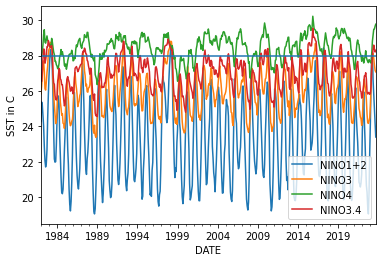

In [4]:
df1.plot(y = ['NINO1+2', 'NINO3', 'NINO4', 'NINO3.4'])
plt.ylabel('SST in C')
plt.axhline(y = 28, linestyle = '-')

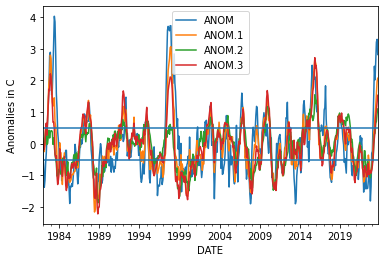

In [7]:
df1.plot(y = ['ANOM', 'ANOM.1', 'ANOM.2', 'ANOM.3'])
plt.ylabel('Anomalies in C')
plt.axhline(y = 0, linestyle = '')
plt.axhline(y = 0.5, linestyle = '-')
plt.axhline(y = -0.5, linestyle = '-')

## Data Exploration

In [53]:
mjo_df = pd.read_csv('mjo.csv', header = 0, index_col = 0, na_values = ['*****'])
mjo_df = mjo_df.iloc[1: , :]
mjo_df.index = pd.to_datetime(mjo_df.index)
display(mjo_df)

INDEX_9 INDEX_10 INDEX_1 INDEX_2 INDEX_3 INDEX_4 INDEX_5 INDEX_6  \
1978-01-03    0.38     1.01    1.28    0.73    0.54   -0.16   -0.77   -1.22   
1978-01-08   -0.99    -0.27    0.82    1.39    1.34    1.10    0.57   -0.26   
1978-01-13   -1.10    -1.17   -0.65    0.33    0.60    1.03    1.18    0.96   
1978-01-18    1.68     0.88   -0.67   -1.78   -1.70   -1.73   -1.25   -0.20   
1978-01-23    2.29     2.45    1.33   -0.69   -1.12   -2.12   -2.50   -2.07   
...            ...      ...     ...     ...     ...     ...     ...     ...   
2023-12-09     NaN      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2023-12-14     NaN      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2023-12-19     NaN      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2023-12-24     NaN      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2023-12-29     NaN      NaN     NaN     NaN     NaN     NaN     NaN     NaN   

           INDEX_7 INDEX_8  
1978-01-03   -1.09   -0.34  
1978-01-08   -1.18   -1.36  
1978-01-13    0.14   -0.69  
1978-01-18    1.25    1.88  
1978-01-23   -0.37    1.40  
...            ...     ...  
2023-12-09     NaN     NaN  
2023-12-14     NaN     NaN  
2023-12-19     NaN     NaN  
2023-12-24     NaN     NaN  
2023-12-29     NaN     NaN  

[3358 rows x 10 columns]

<AxesSubplot:>

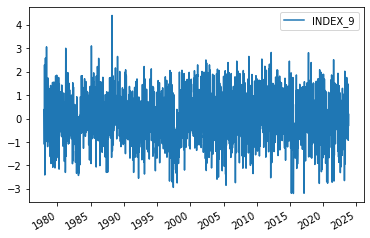

In [56]:
mjo_df['INDEX_9'] = mjo_df['INDEX_9'].astype(float)
mjo_df.plot()

In [32]:
oni_df = pd.read_csv('oni.csv', header = 0, index_col = 0)
oni_df.set_index('YR', inplace = True)
display(oni_df)

SEAS  TOTAL  ANOM
YR                    
1950  DJF  24.72 -1.53
1950  JFM  25.17 -1.34
1950  FMA  25.75 -1.16
1950  MAM  26.12 -1.18
1950  AMJ  26.32 -1.07
...   ...    ...   ...
2023  MAM  27.85  0.16
2023  AMJ  28.31  0.48
2023  MJJ  28.43  0.77
2023  JJA  28.36  1.07
2023  JAS  28.28  1.32

[884 rows x 3 columns]

<AxesSubplot:xlabel='YR'>

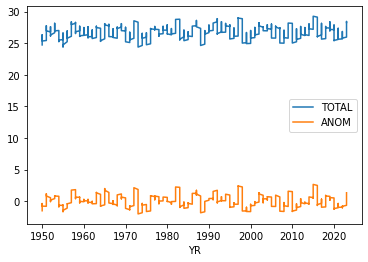

In [48]:
oni_df.plot()

In [45]:
pdo_df = pd.read_csv('pdo.csv', header = 0, index_col = 0, na_values = [99.99])
pdo_df.set_index('Year', inplace = True)
display(pdo_df)

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
Year                                                                        
1854  0.11 -0.24 -0.40 -0.44 -0.54 -0.30 -0.10 -1.24 -1.00 -2.23 -1.68 -1.76
1855 -0.20 -0.39 -0.24 -0.58 -1.34 -1.88 -1.13 -0.48 -0.76 -0.63 -0.41 -0.88
1856 -0.39  0.47  0.42 -0.96 -1.26 -2.15 -0.69  0.63  0.58  0.59  0.23  0.04
1857 -0.52 -1.67 -1.05 -0.81 -0.65  1.03  1.17  0.81  0.84  0.70  0.38 -0.55
1858 -0.96 -1.53 -1.76 -0.82  0.49  2.19  1.05  0.67  1.38  2.35  0.46 -1.16
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
2019 -0.34 -0.72 -0.39  0.10  0.26 -0.05  0.54  0.01  0.13 -0.90 -0.49  0.00
2020 -1.41 -1.48 -1.75 -1.32 -0.53 -0.76 -0.92 -1.33 -1.04 -0.62 -1.59 -0.99
2021 -0.61 -1.10 -1.68 -1.85 -2.01 -1.81 -1.96 -0.94 -1.96 -3.11 -2.75 -2.71
2022 -2.40 -1.91 -1.67 -2.10 -2.25 -1.34 -2.62 -2.38 -2.29 -1.80 -2.41 -2.21
2023 -1.25 -1.65 -2.45 -3.07 -2.41 -2.53 -2.52 -2.46 -2.94   NaN   NaN   NaN

[170 rows x 12 columns]

<AxesSubplot:xlabel='Year'>

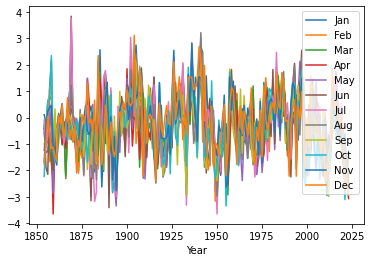

In [46]:
pdo_df.plot()

In [23]:
pna_df = pd.read_csv('pna.csv', header = 0, index_col = 0)

display(pna_df)

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1950 -2.34 -1.04  0.24  0.01 -0.55 -1.97 -0.43  0.82 -1.15  0.49 -1.81  0.02
1951 -0.41 -1.36 -0.81  0.73  1.26 -0.61 -0.02  0.05 -0.05  0.24  0.23 -1.29
1952 -1.98  0.28 -0.40  1.16 -0.99  0.39 -1.23  0.80  0.53  0.80  0.82  0.93
1953  0.65  1.00 -0.15  1.05  1.20 -1.60  0.74 -1.12 -0.12  1.91  1.65  1.27
1954 -1.14 -0.14 -1.17 -2.70  0.64 -0.02  0.30 -0.08  0.00  0.75  1.45 -0.52
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
2019  0.83 -1.08  0.25 -0.61 -0.29  0.12  1.11  1.18  2.00 -1.02 -0.06  0.18
2020 -0.24  0.17 -2.17 -1.18  0.21  0.70  1.73  1.82  0.75 -1.13  0.24  1.58
2021  0.19 -0.31 -0.97 -1.05 -1.35  0.67  0.56  0.95  0.44  1.13  0.72 -2.56
2022  1.01  0.66  0.13 -0.74 -0.83 -0.31  2.54  0.79  0.21  0.17 -0.73 -0.66
2023  0.21 -0.64 -1.63 -0.42 -0.86  0.69  1.15  0.45  1.06   NaN   NaN   NaN

[74 rows x 12 columns]

<AxesSubplot:>

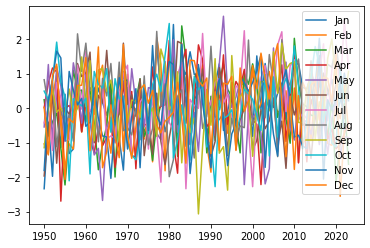

In [41]:
pna_df.plot()

In [34]:
soi1_df = pd.read_csv('soi1.csv', header = 0, index_col = 0)
soi1_df.set_index('YEAR', inplace = True)
display(soi1_df)

JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC
YEAR                                                            
1951  2.5  1.5 -0.2 -0.5 -1.1  0.3 -1.7 -0.4 -1.8 -1.6 -1.3 -1.2
1952 -1.5 -1.0  0.9 -0.4  1.2  1.2  0.8  0.1 -0.4  0.6  0.0 -2.0
1953  0.5 -0.8 -0.3  0.3 -2.8  0.2 -0.0 -2.0 -2.1  0.1 -0.5 -0.8
1954  1.1 -0.5  0.4  1.1  0.8  0.2  0.7  1.8  0.3  0.4  0.2  2.3
1955 -0.9  3.1  1.1 -0.2  1.7  2.2  2.6  2.4  2.2  2.5  2.0  1.6
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2018  1.8 -0.8  2.4  0.8  0.6 -0.2  0.4 -0.5 -1.5  0.6 -0.1  1.7
2019 -0.1 -2.3 -0.5  0.2 -0.7 -0.7 -0.6 -0.2 -1.9 -0.6 -1.4 -0.9
2020  0.3 -0.1 -0.2  0.3  0.7 -0.6  0.7  1.8  1.5  0.8  1.1  3.0
2021  3.2  2.5  0.6  0.6  0.8  0.7  2.3  1.0  1.3  1.2  1.6  2.5
2022  0.8  1.8  2.9  2.8  2.4  2.8  1.3  1.7  2.7  2.8  0.5  3.5

[72 rows x 12 columns]

<AxesSubplot:xlabel='YEAR'>

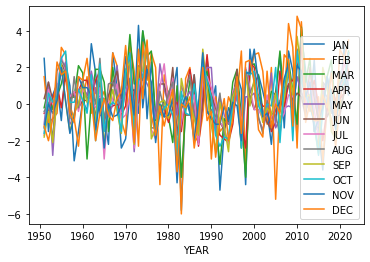

In [42]:
soi1_df.plot()

In [3]:
snotel_df = pd.read_csv('snotel.csv', index_col = 0)
snotel_df.index = pd.to_datetime(snotel_df.index)
display(snotel_df)

site  station  PREC_DAILY  \
date                                                                      
1984-04-01                        boise_r_nr_boise      306        35.9   
1985-04-01                        boise_r_nr_boise      306        29.4   
1986-04-01                        boise_r_nr_boise      306        43.5   
1987-04-01                        boise_r_nr_boise      306        17.5   
1988-04-01                        boise_r_nr_boise      306        24.5   
...                                            ...      ...         ...   
2019-04-01  merced_river_yosemite_at_pohono_bridge      846        30.2   
2020-04-01  merced_river_yosemite_at_pohono_bridge      846         9.8   
2021-04-01  merced_river_yosemite_at_pohono_bridge      846        14.2   
2022-04-01  merced_river_yosemite_at_pohono_bridge      846        18.9   
2023-04-01  merced_river_yosemite_at_pohono_bridge      846        46.2   

            WTEQ_DAILY  TAVG_DAILY  TMAX_DAILY  TMIN_DAILY  SNWD_DAILY  
date                                                                    
1984-04-01        31.3         NaN         NaN         NaN         NaN  
1985-04-01        27.7         NaN         NaN         NaN         NaN  
1986-04-01        39.5         NaN         NaN         NaN         NaN  
1987-04-01        18.5         NaN         NaN         NaN         NaN  
1988-04-01        22.6         NaN         NaN         NaN         NaN  
...                ...         ...         ...         ...         ...  
2019-04-01        27.2        39.2        50.0        31.5        73.0  
2020-04-01         7.5        33.6        39.9        27.5        28.0  
2021-04-01        10.6        40.5        52.9        31.5        36.0  
2022-04-01        10.5        37.8        51.4        26.2        28.0  
2023-04-01        53.9        33.6        44.1        22.1       141.0  

[15157 rows x 8 columns]

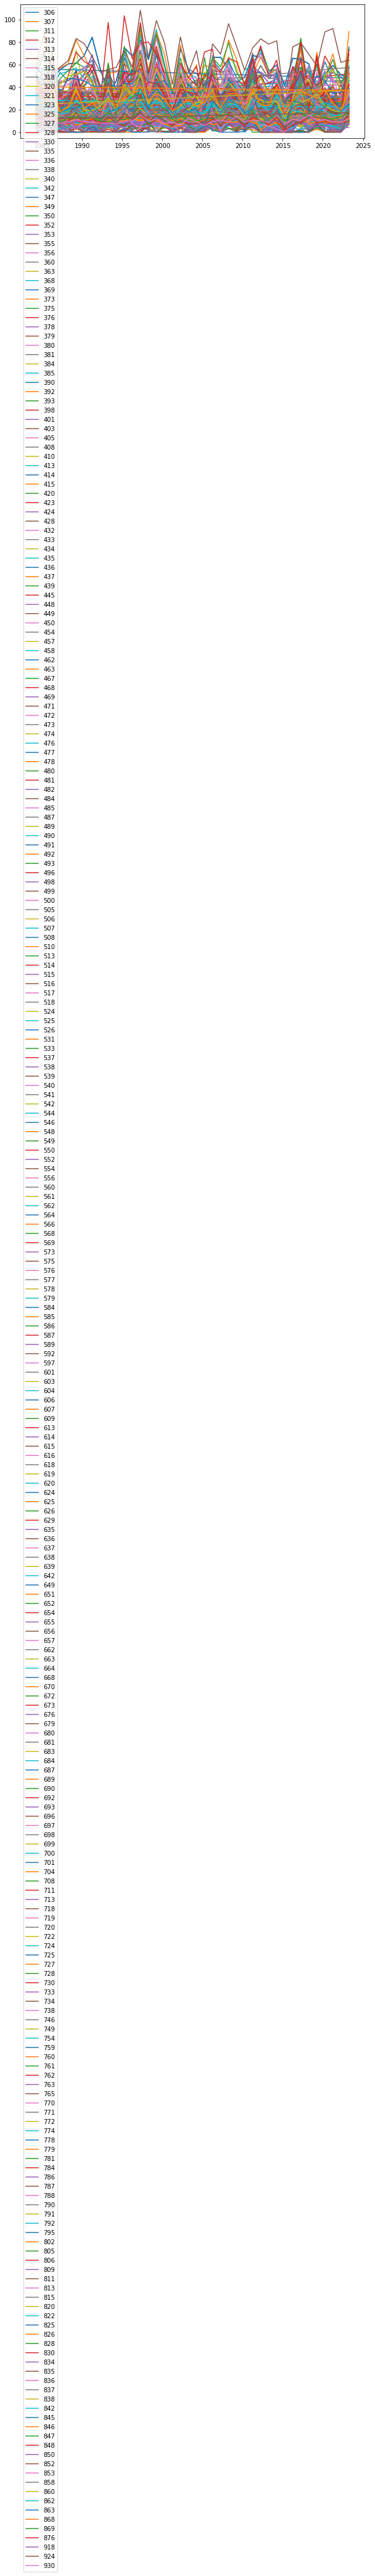

In [5]:
fig, ax = plt.subplots(figsize = (10,4))
for key, grp in snotel_df.groupby(['station']):
    ax.plot(grp['WTEQ_DAILY'], label = key)

ax.legend()
plt.show()

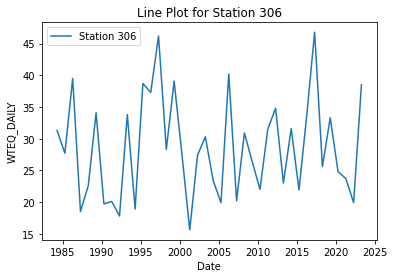

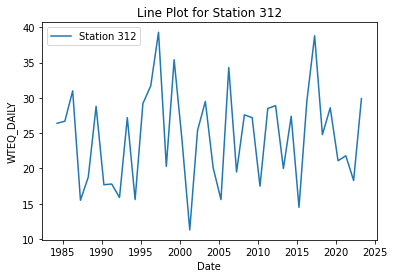

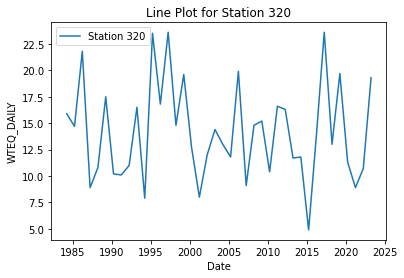

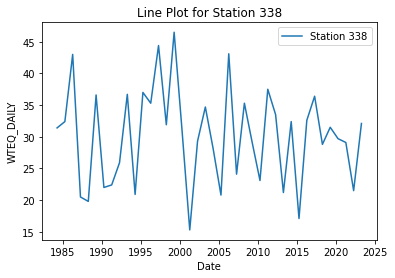

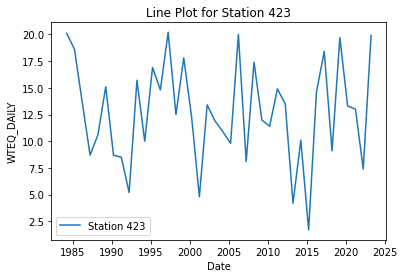

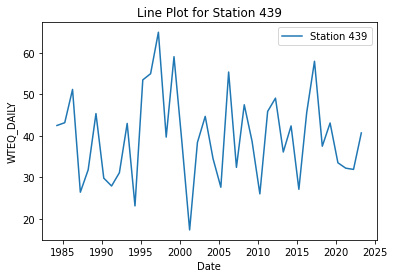

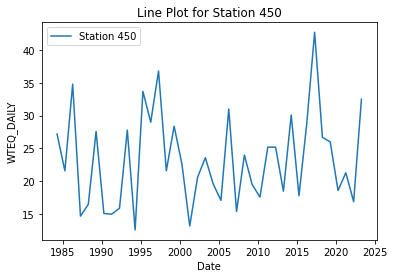

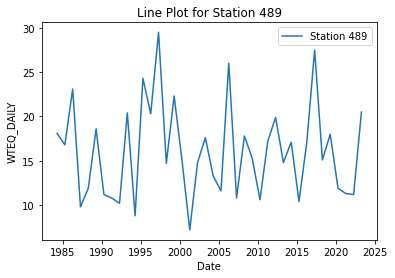

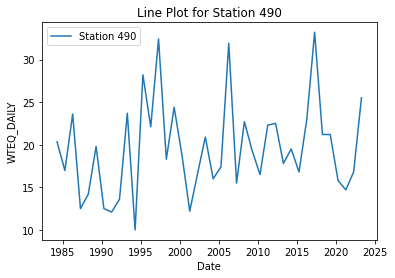

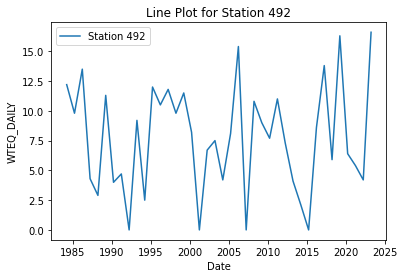

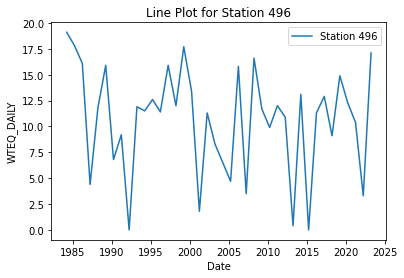

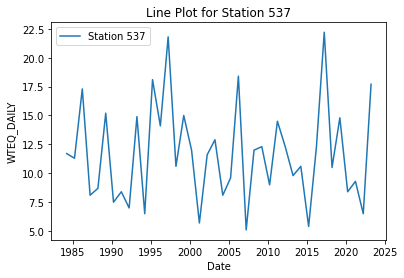

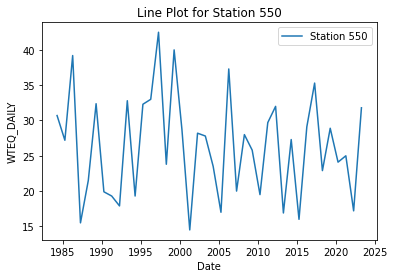

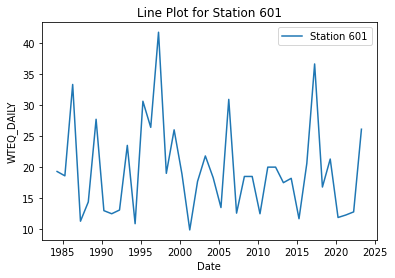

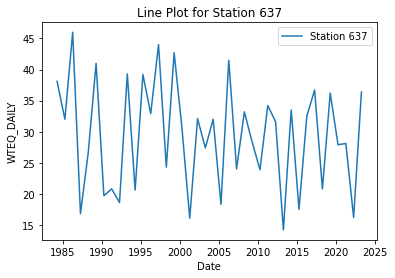

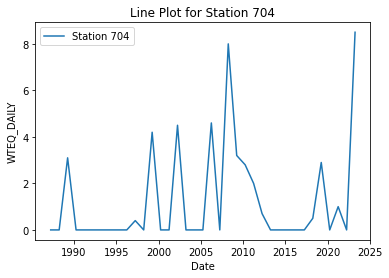

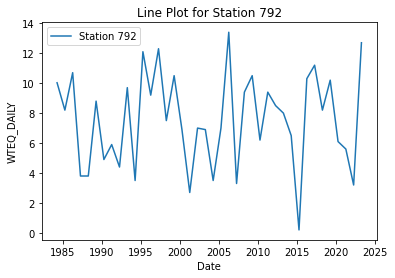

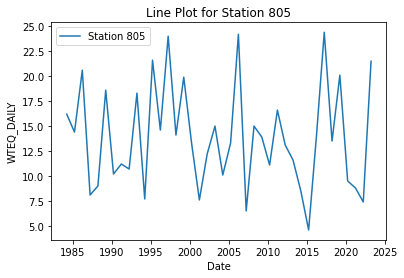

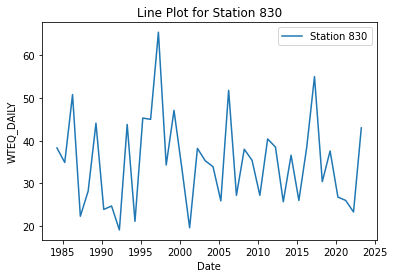

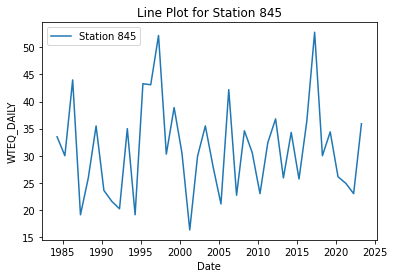

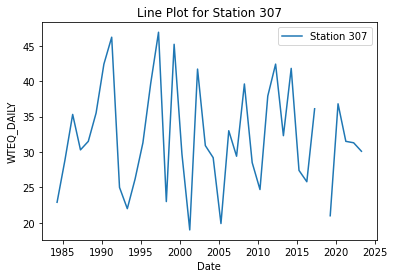

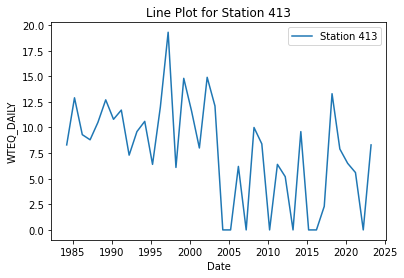

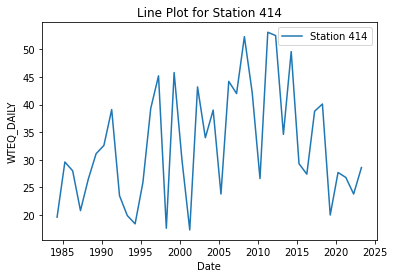

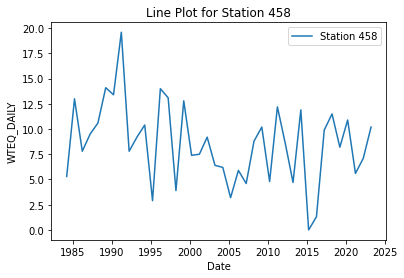

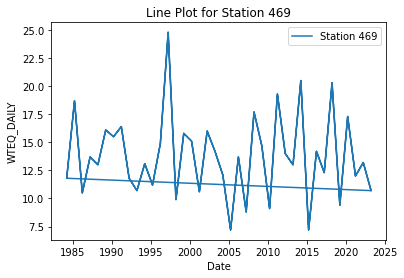

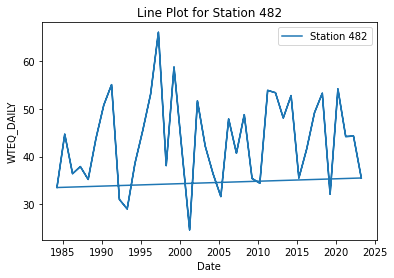

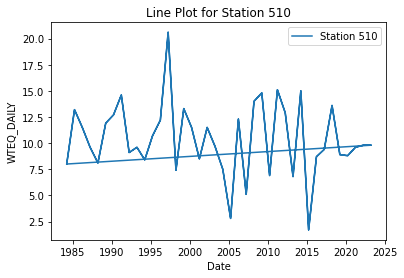

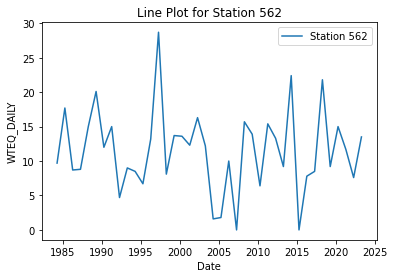

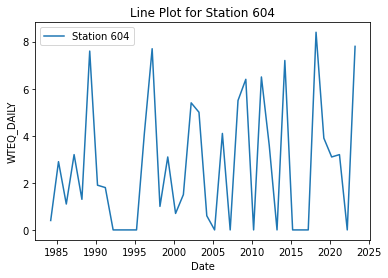

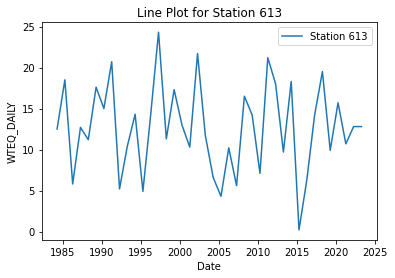

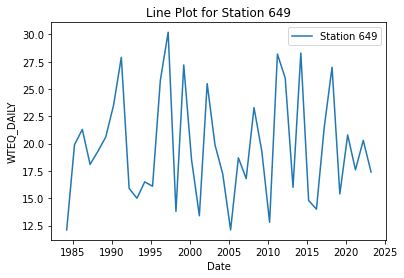

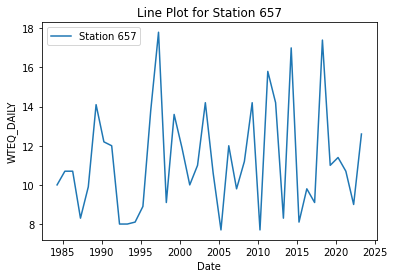

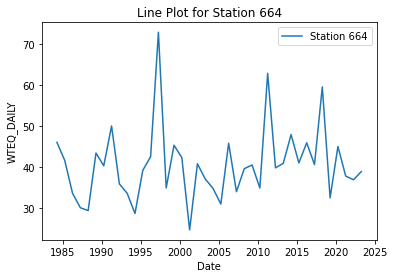

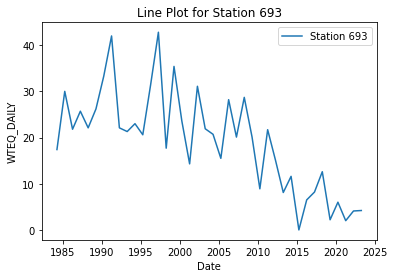

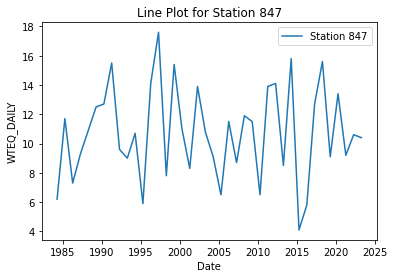

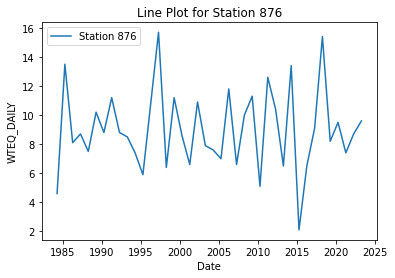

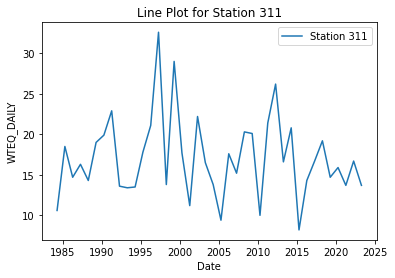

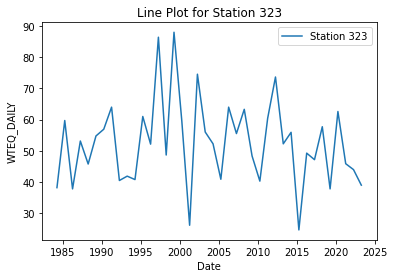

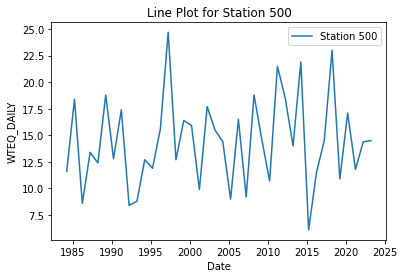

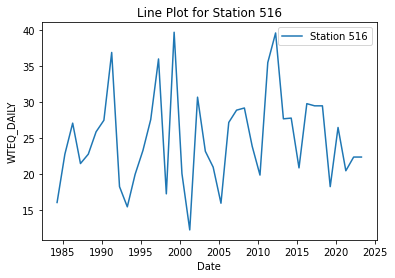

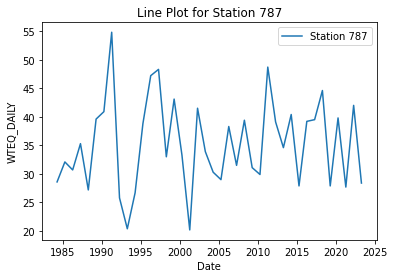

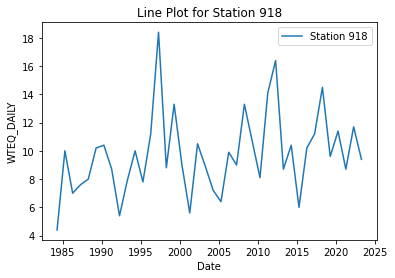

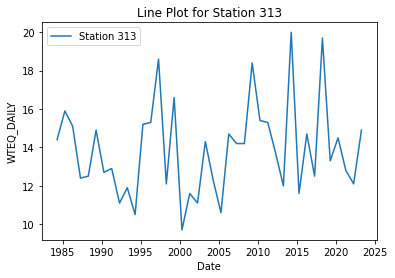

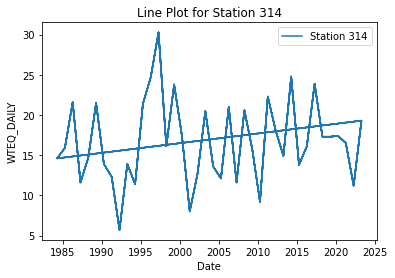

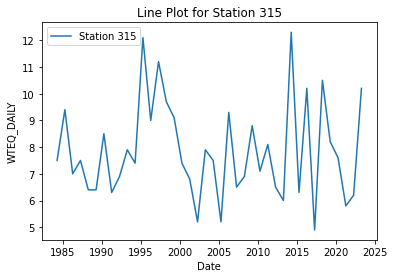

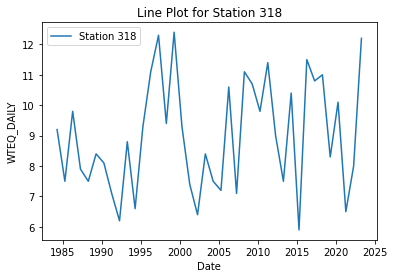

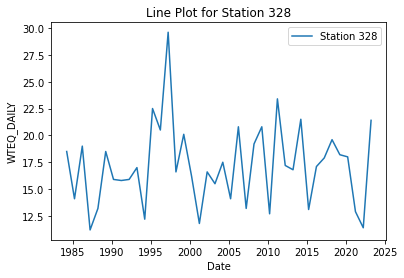

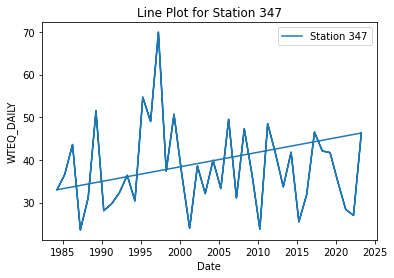

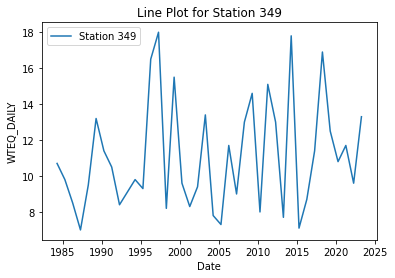

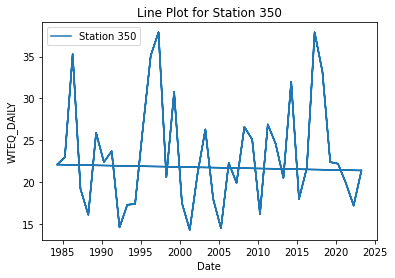

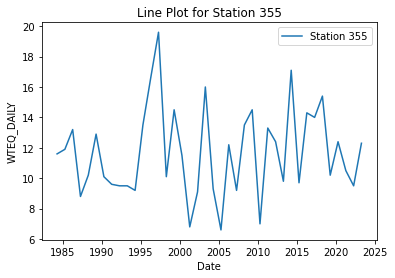

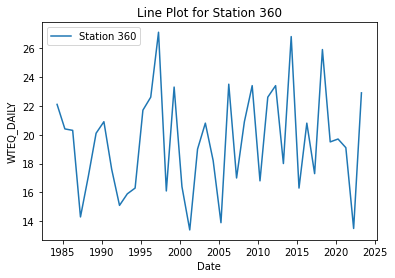

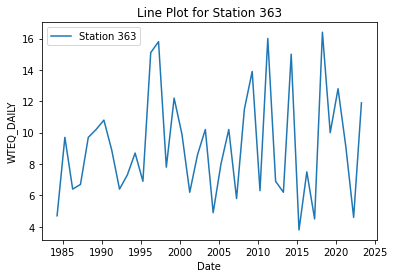

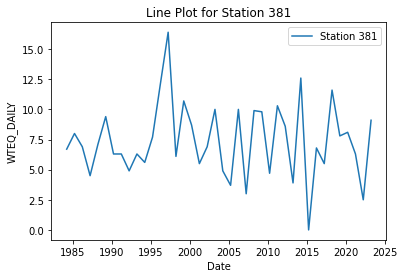

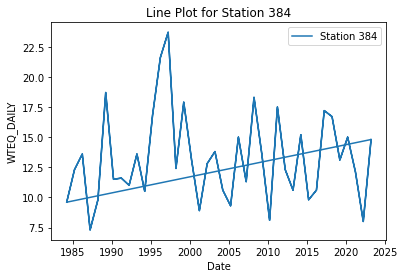

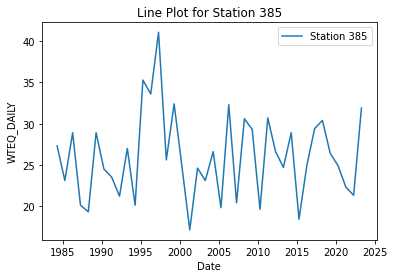

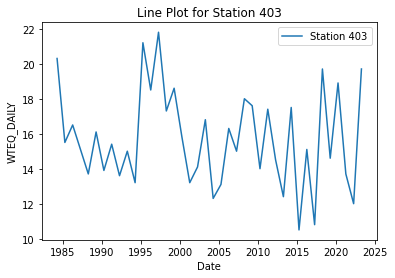

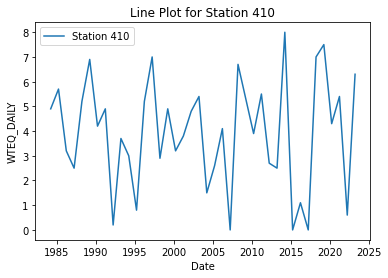

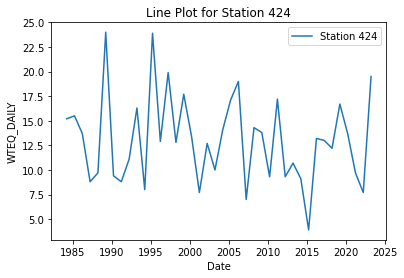

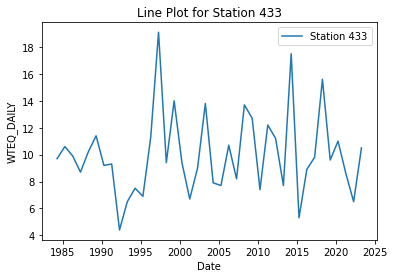

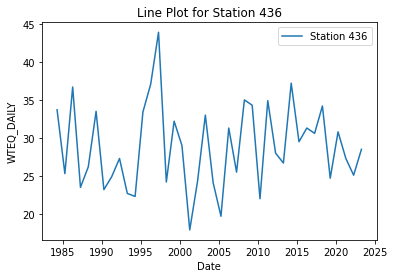

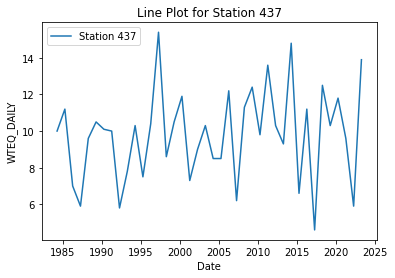

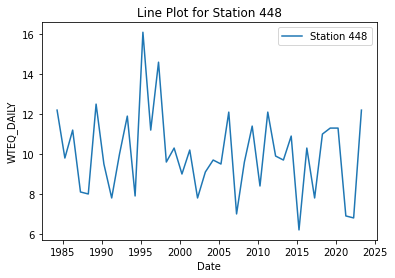

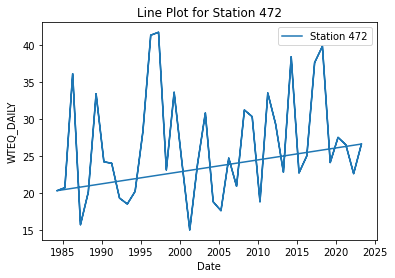

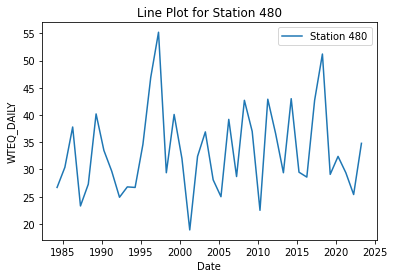

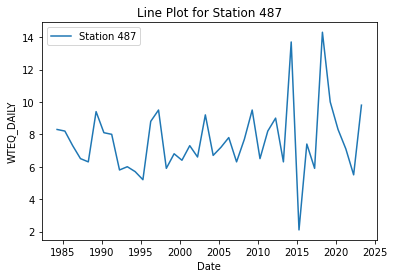

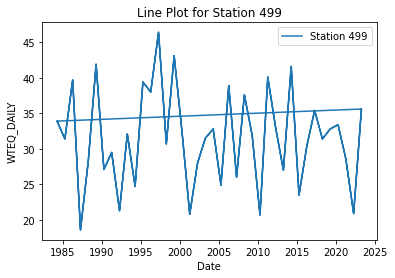

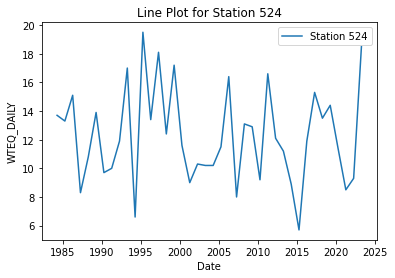

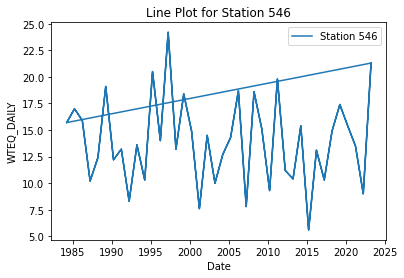

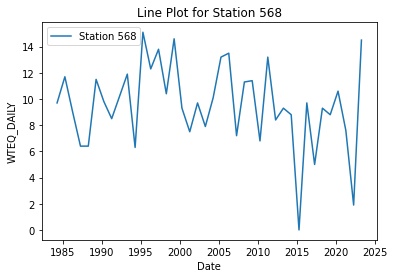

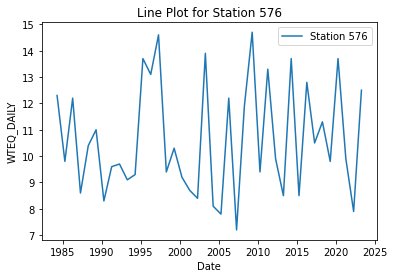

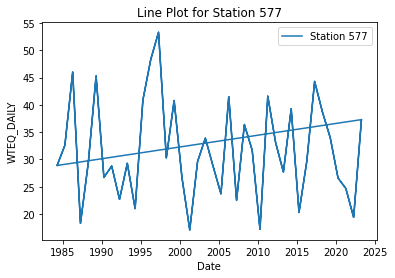

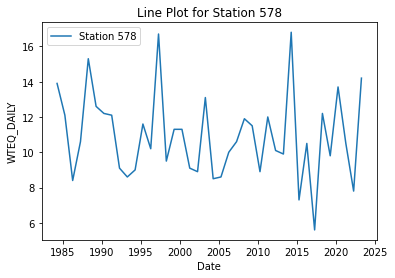

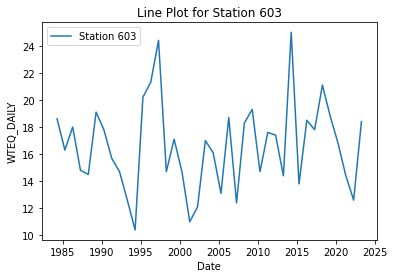

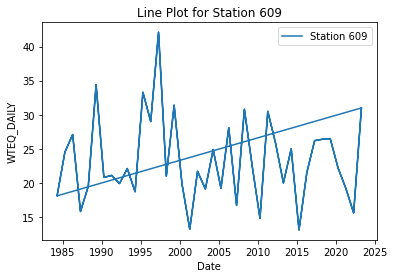

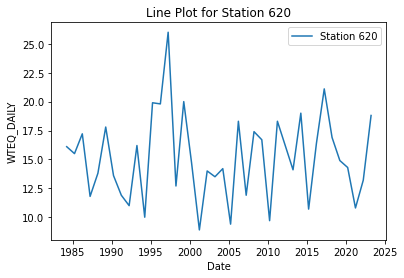

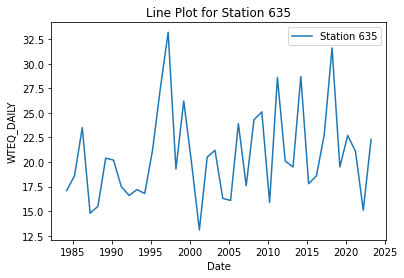

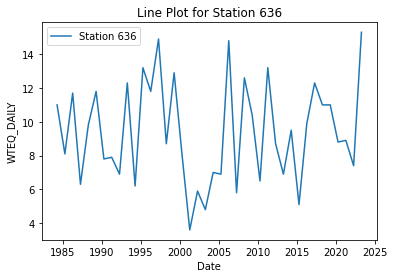

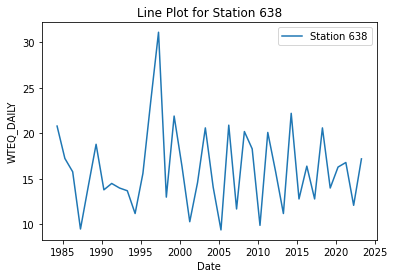

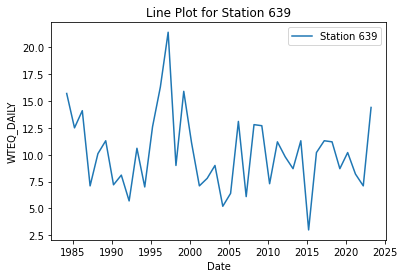

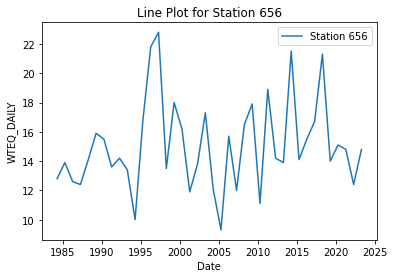

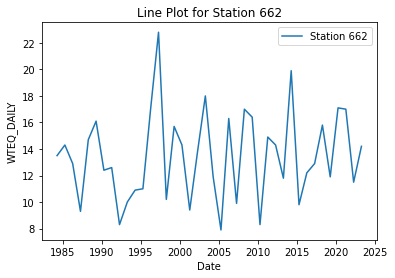

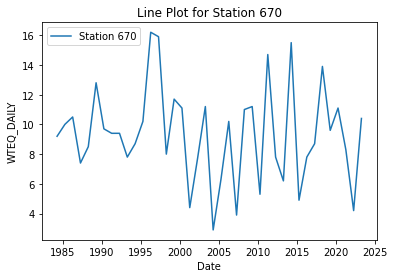

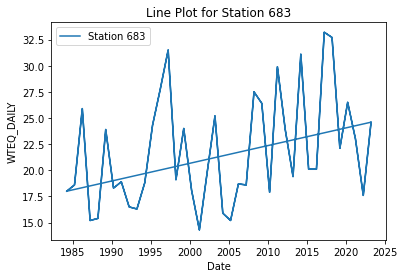

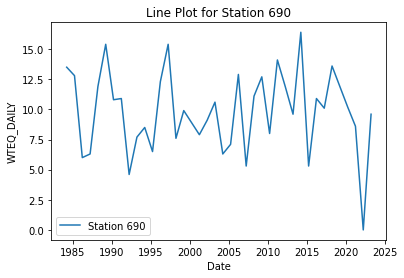

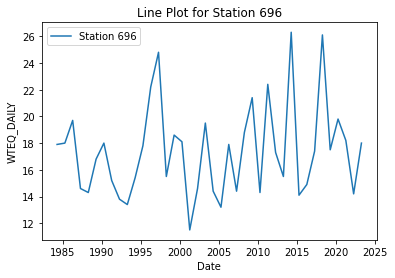

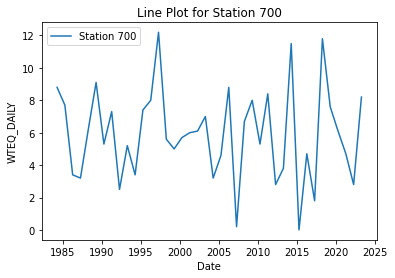

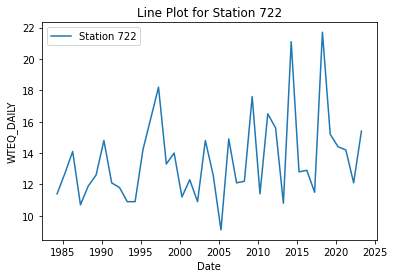

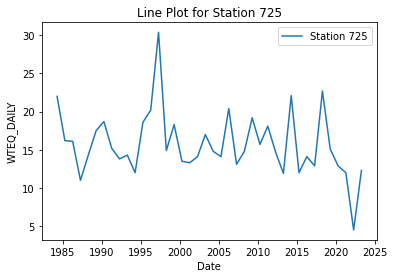

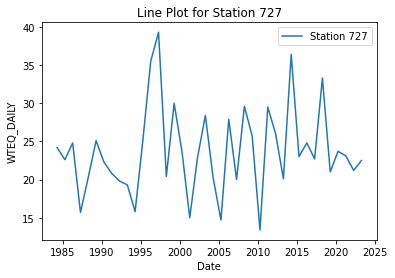

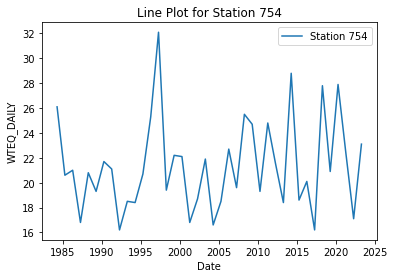

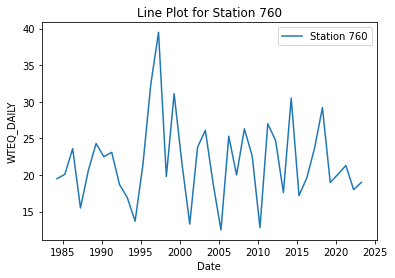

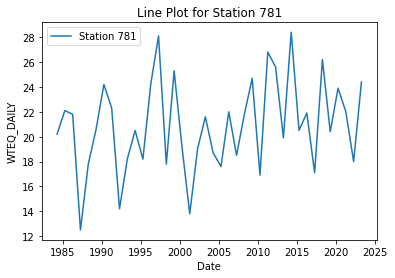

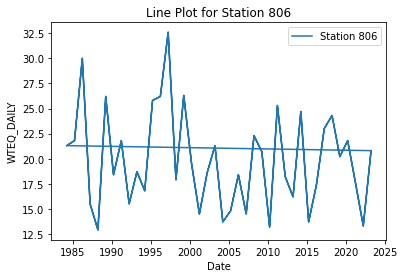

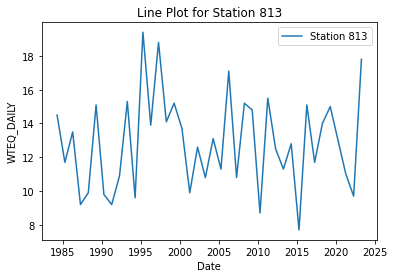

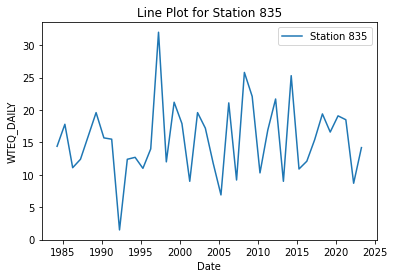

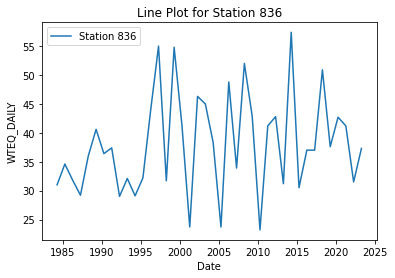

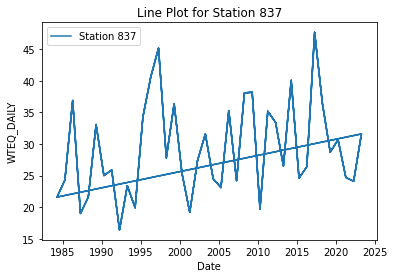

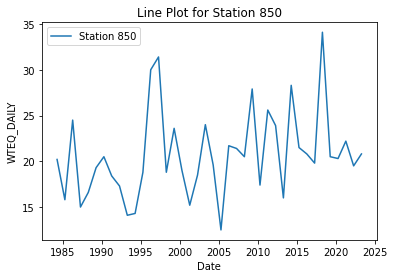

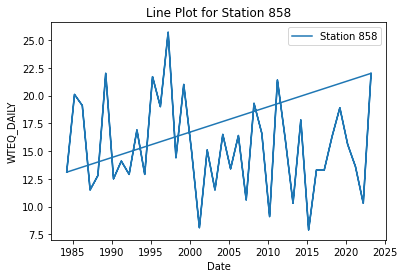

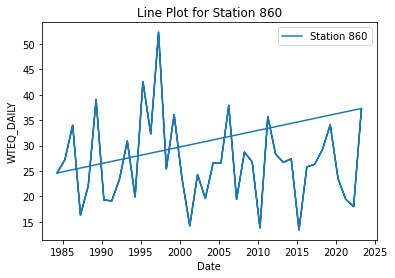

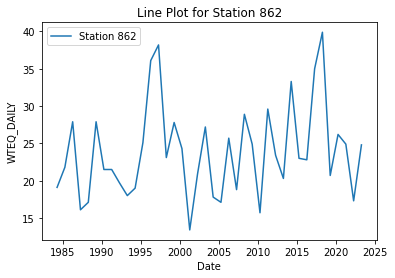

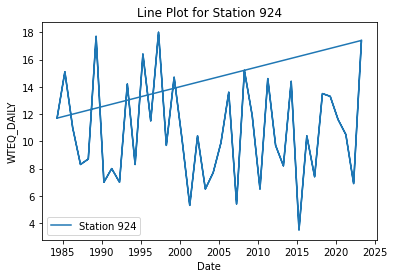

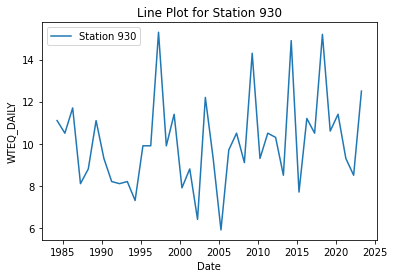

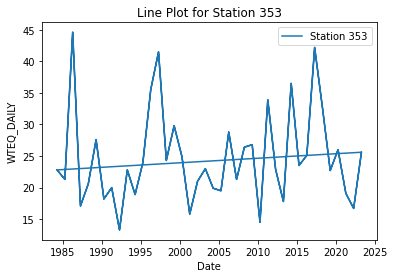

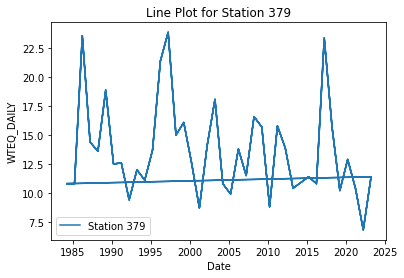

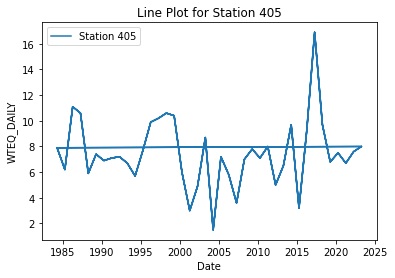

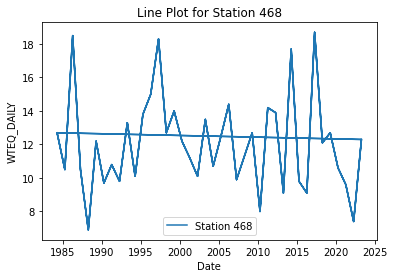

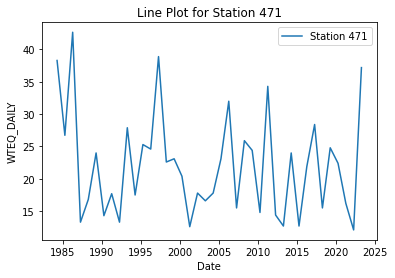

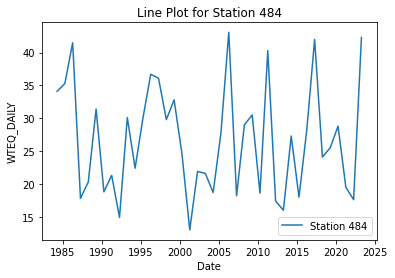

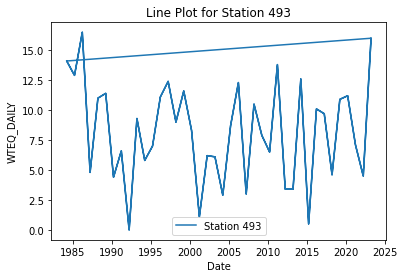

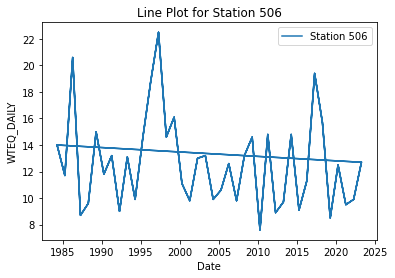

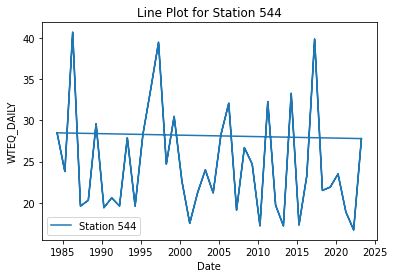

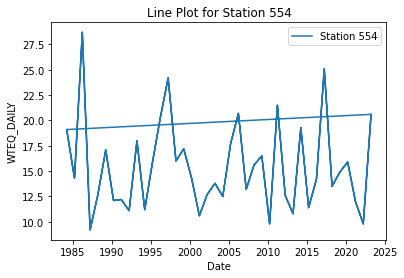

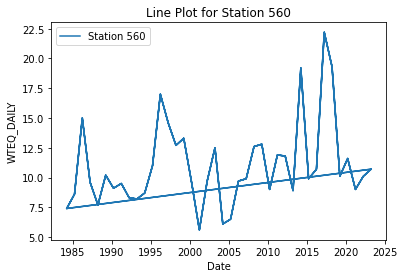

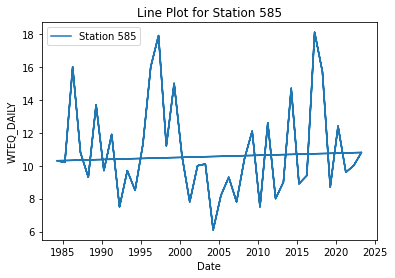

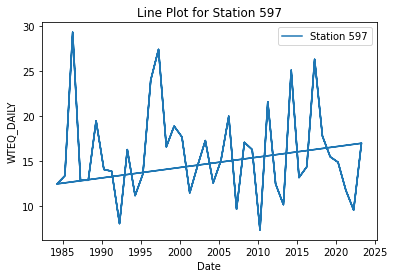

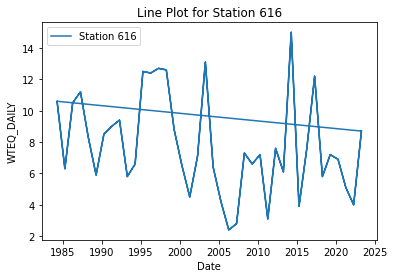

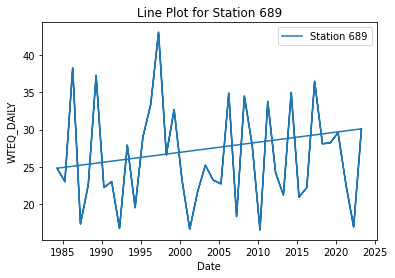

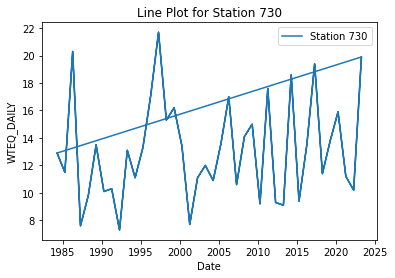

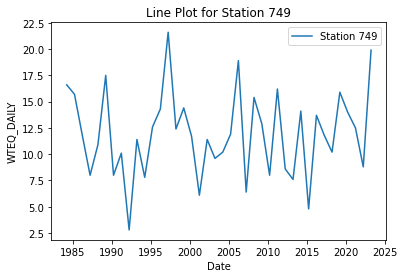

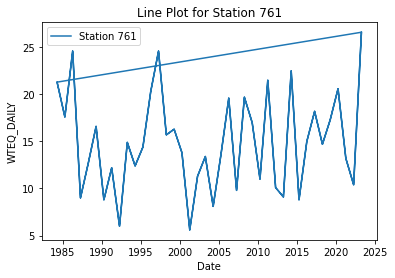

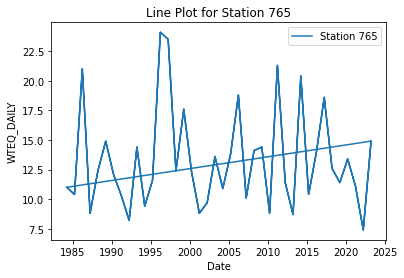

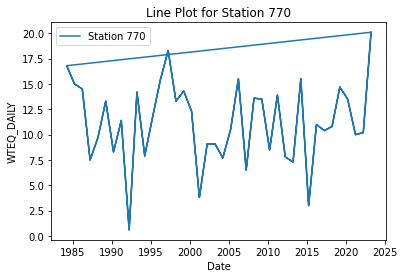

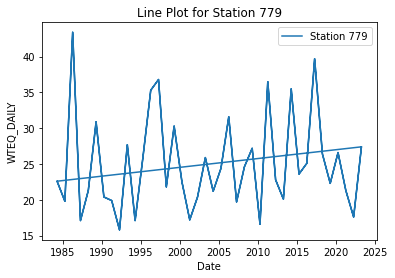

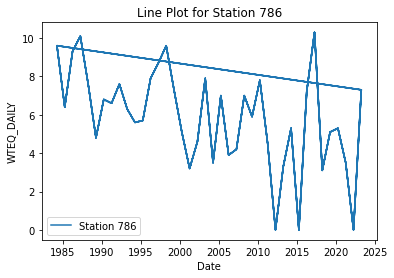

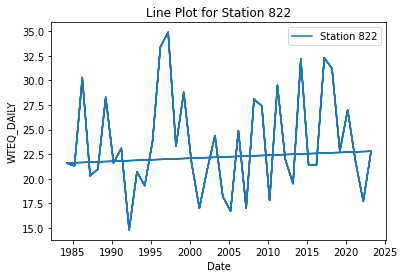

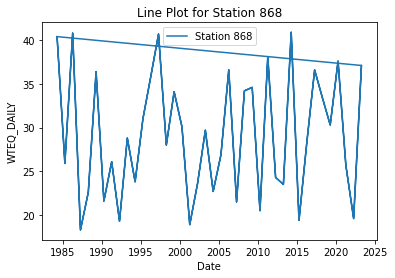

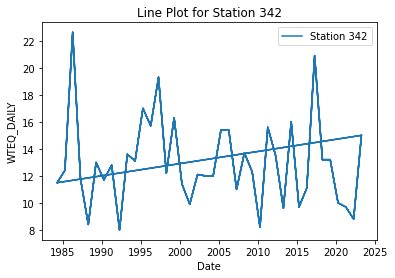

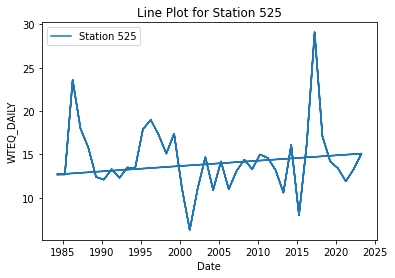

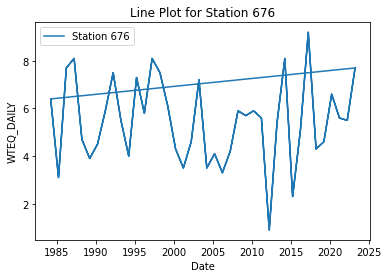

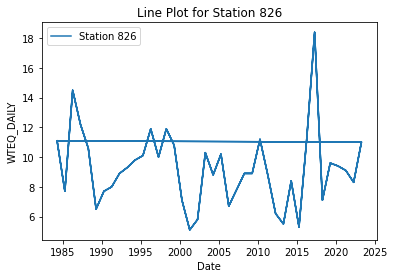

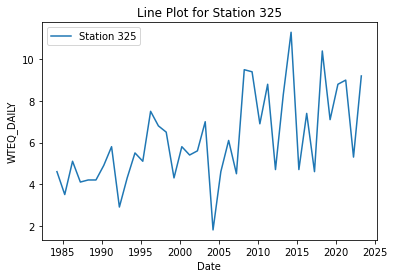

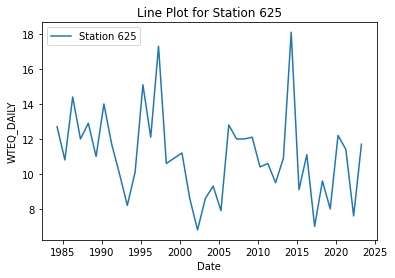

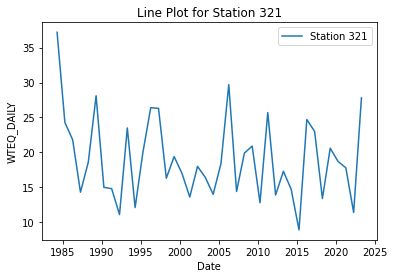

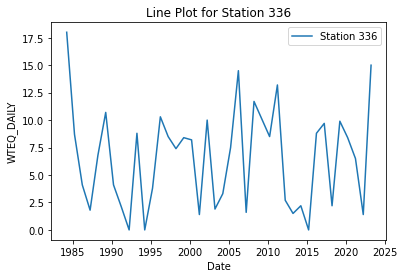

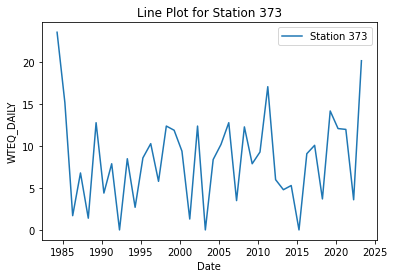

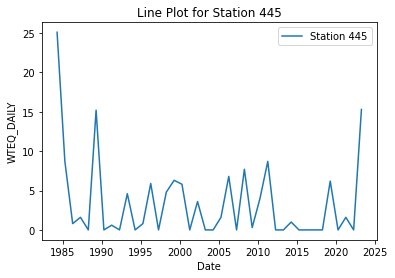

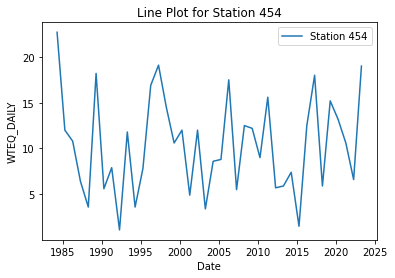

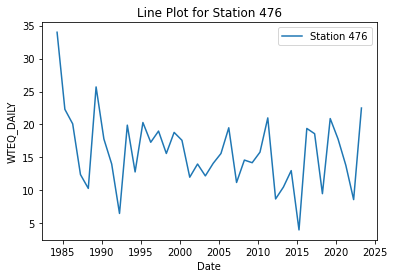

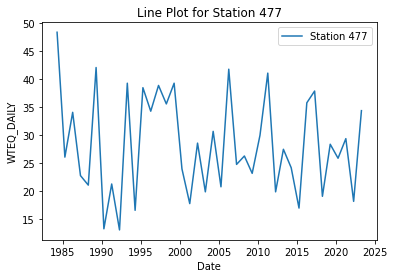

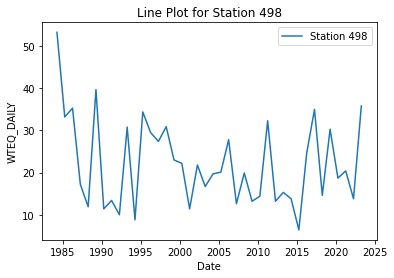

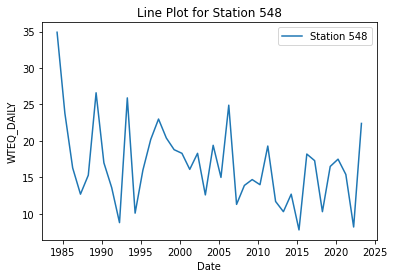

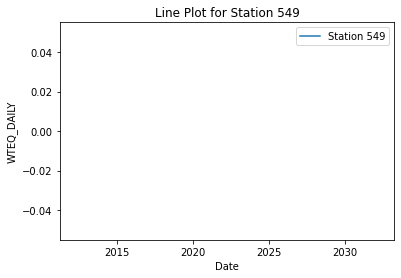

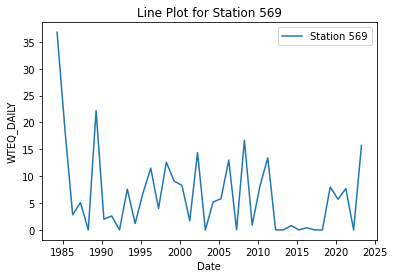

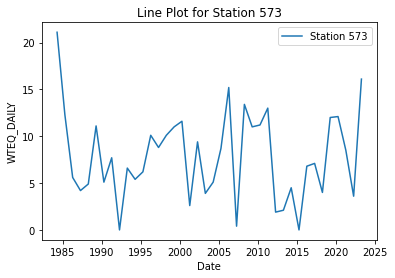

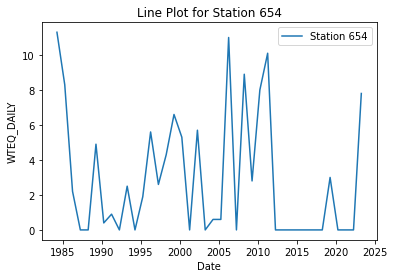

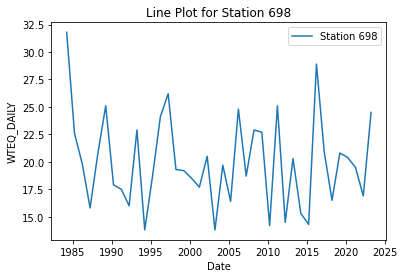

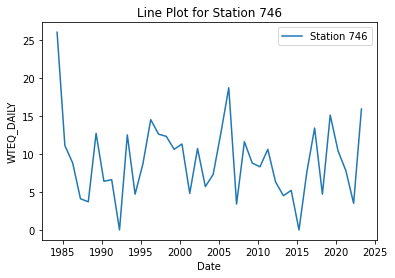

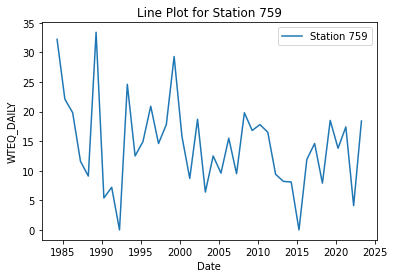

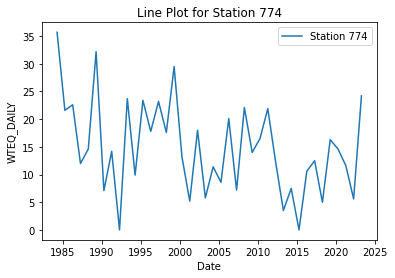

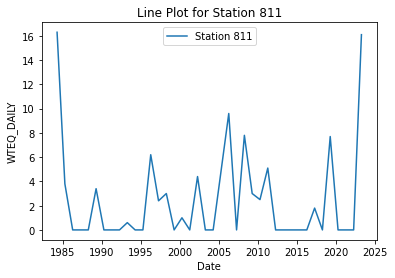

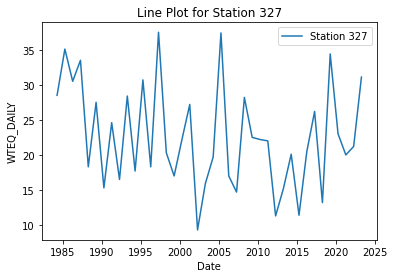

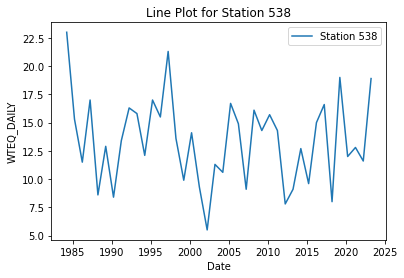

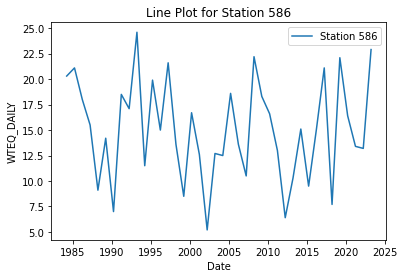

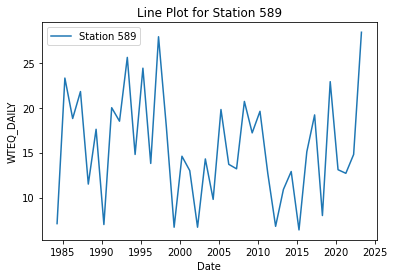

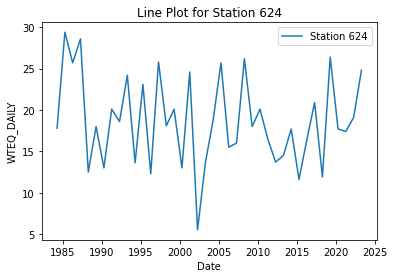

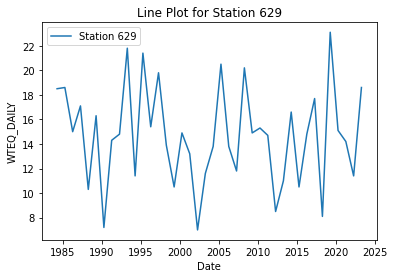

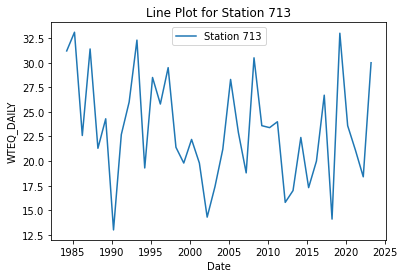

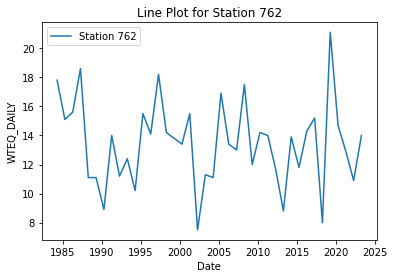

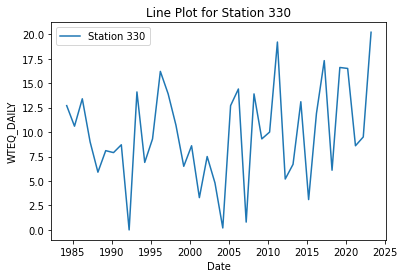

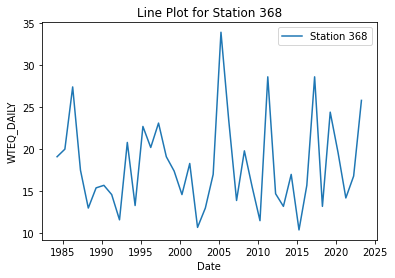

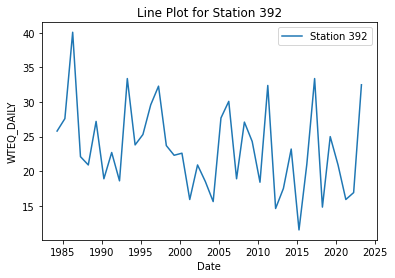

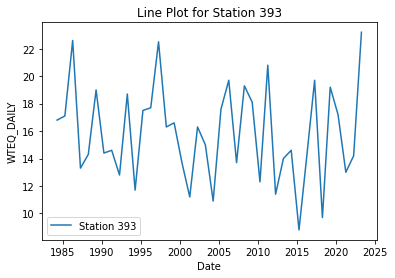

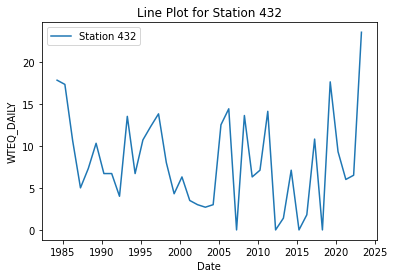

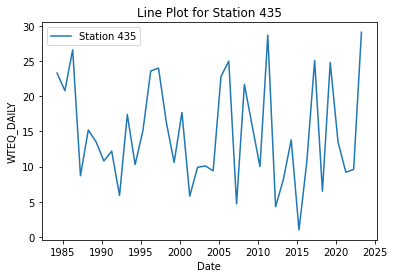

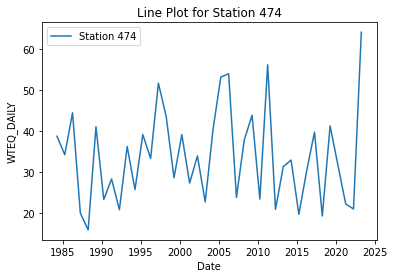

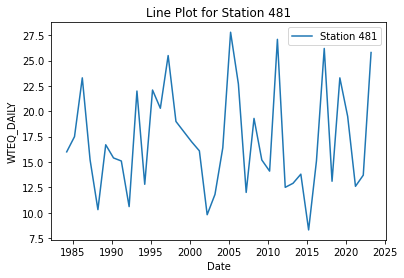

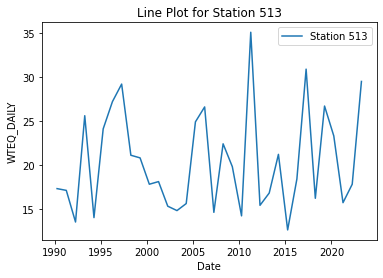

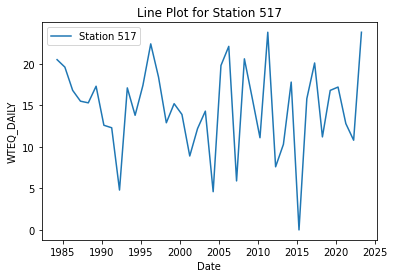

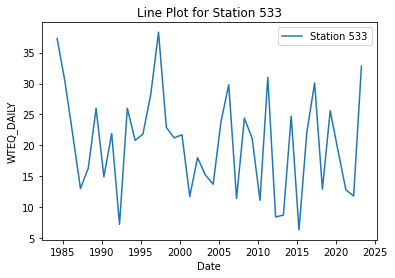

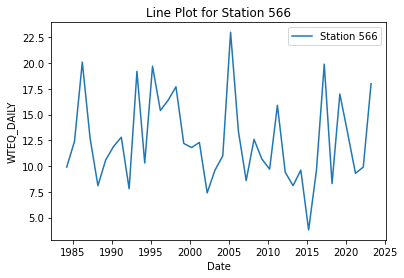

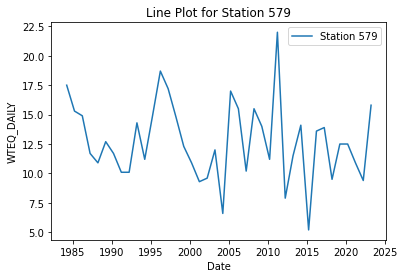

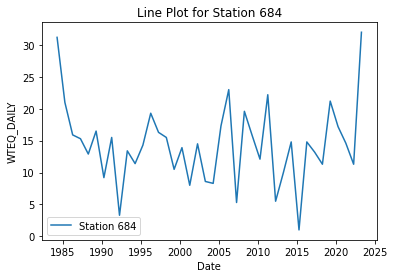

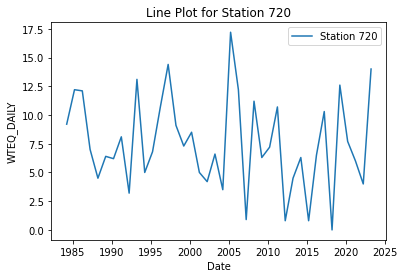

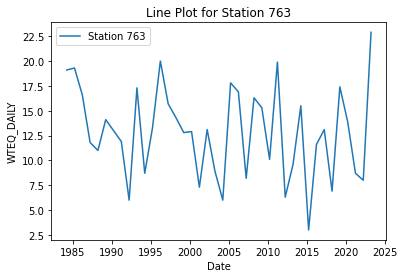

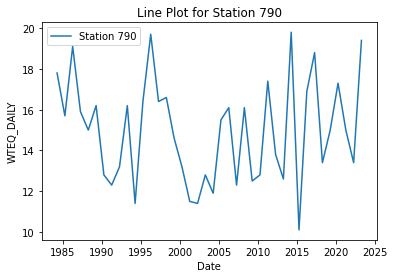

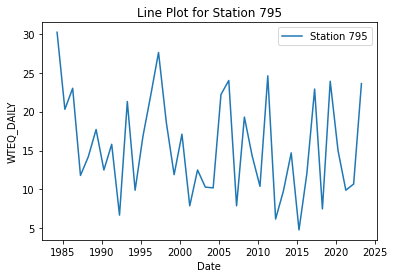

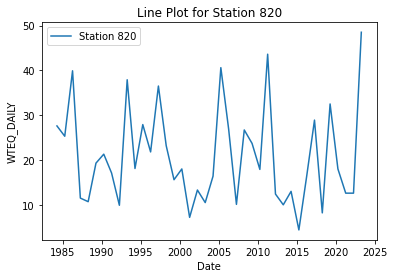

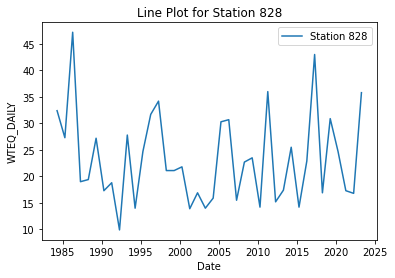

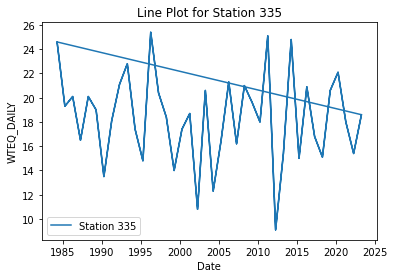

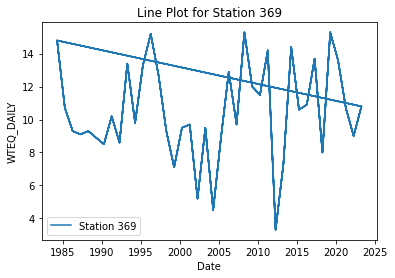

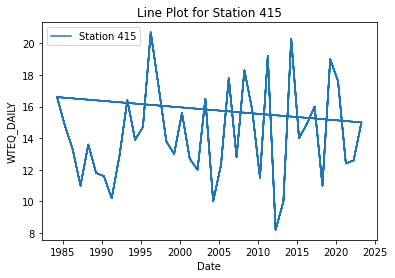

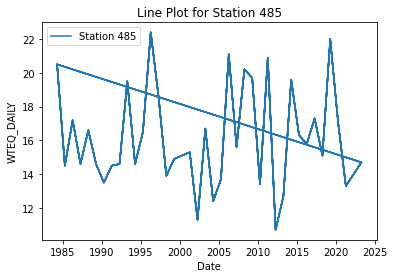

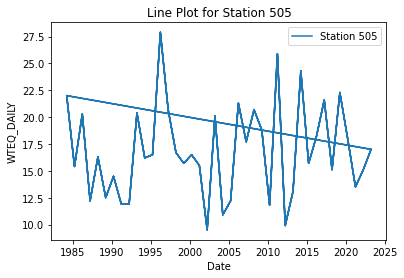

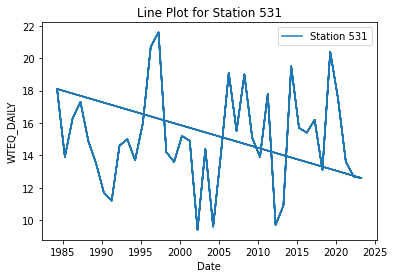

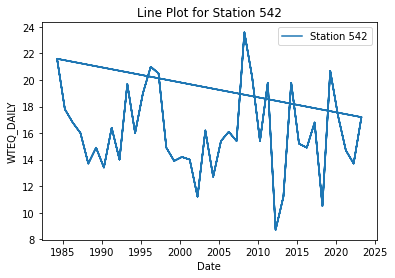

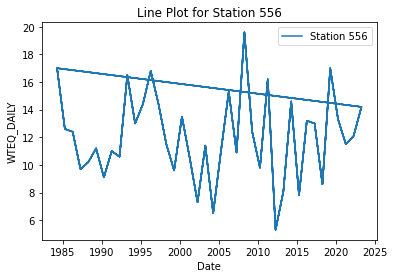

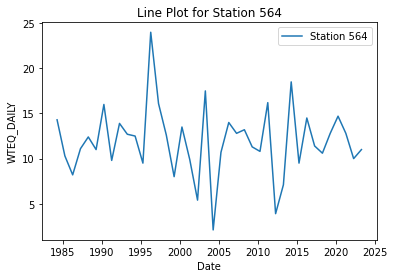

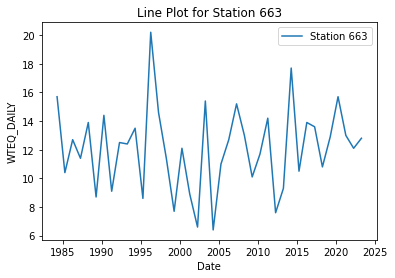

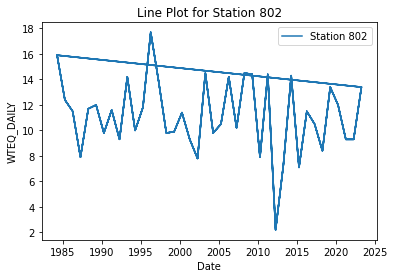

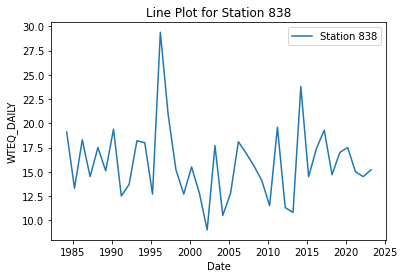

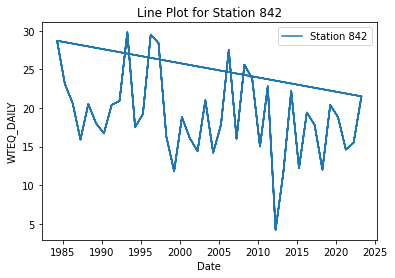

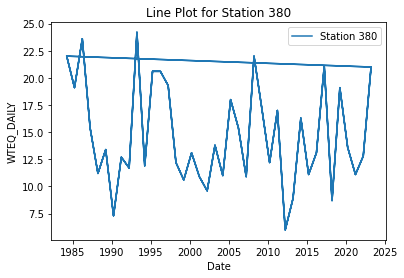

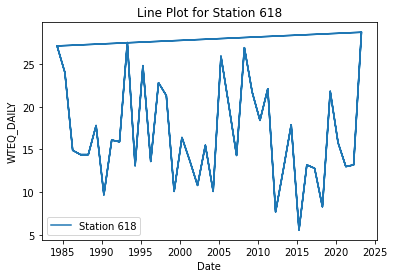

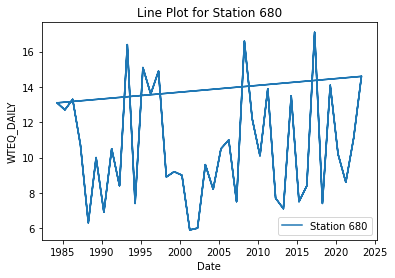

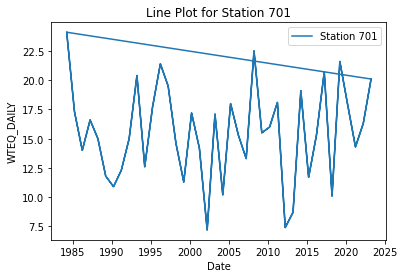

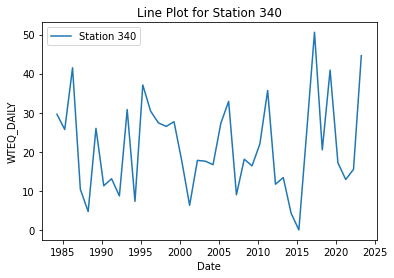

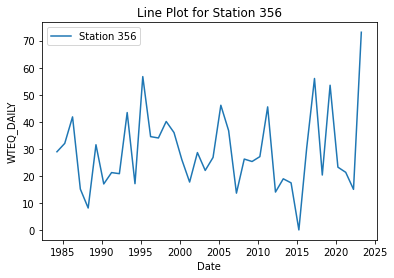

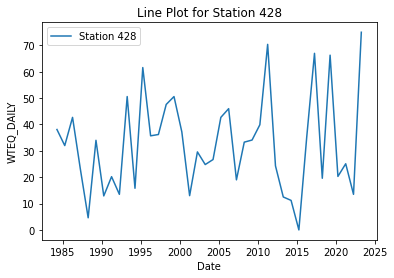

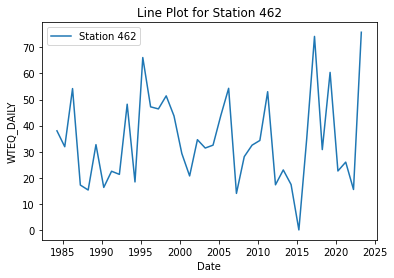

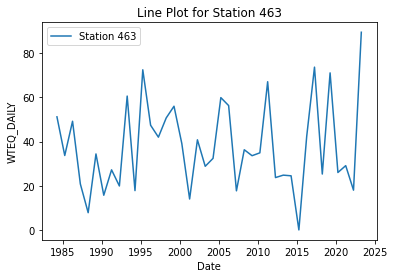

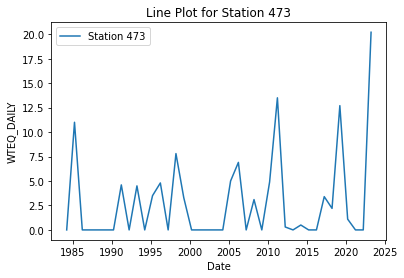

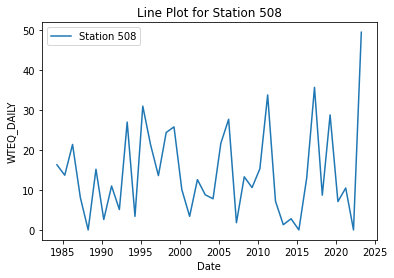

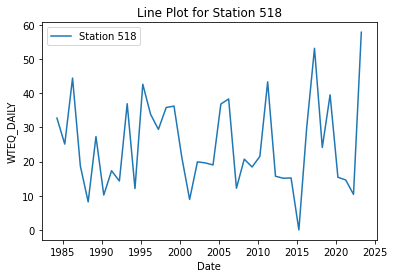

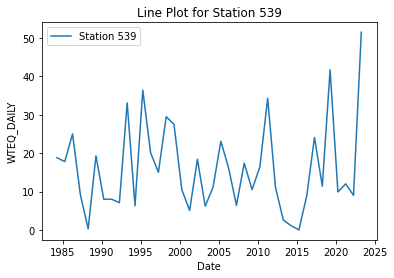

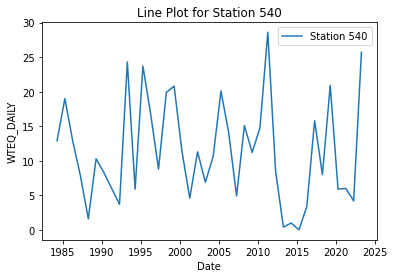

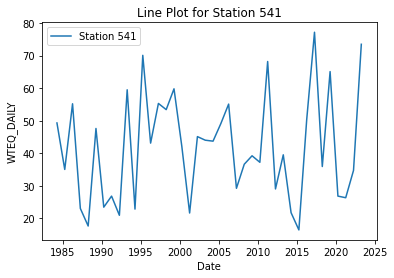

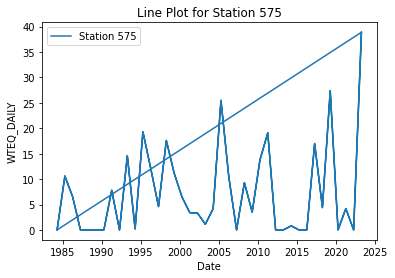

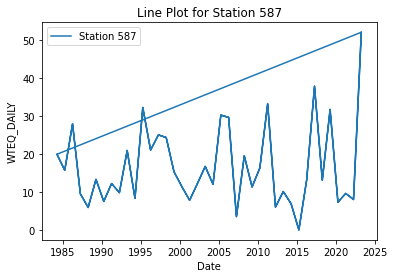

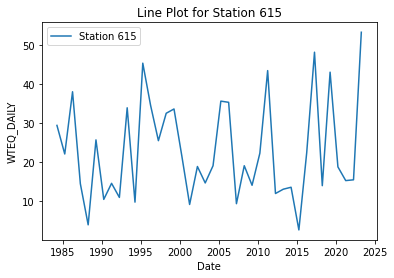

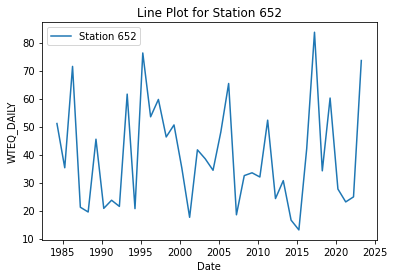

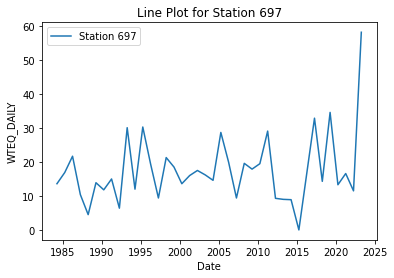

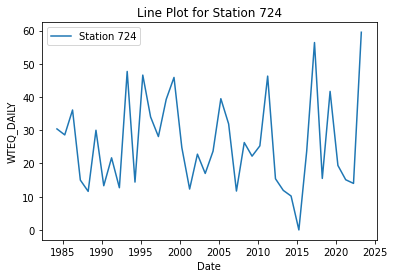

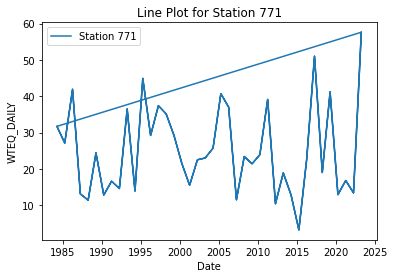

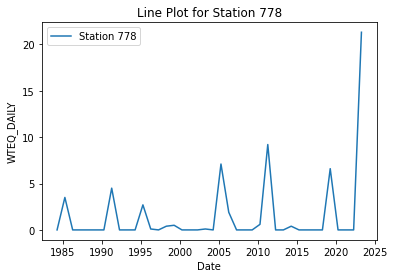

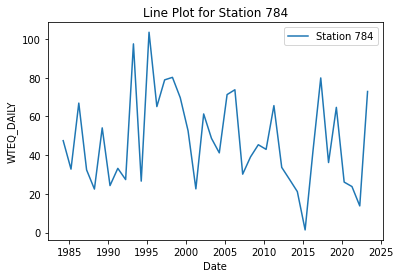

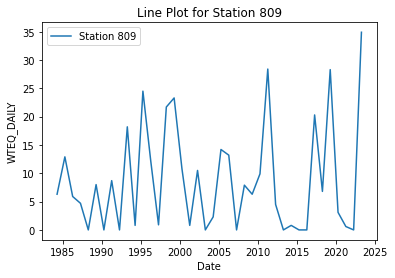

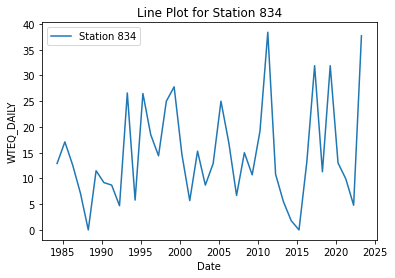

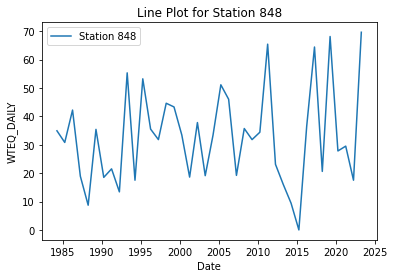

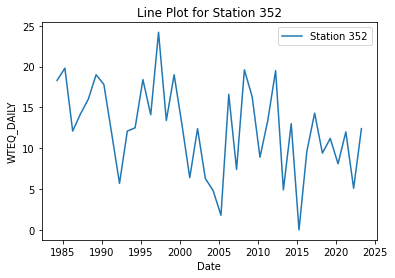

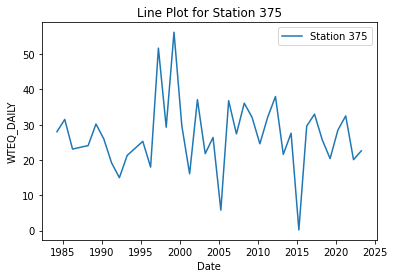

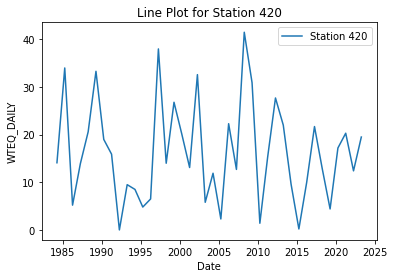

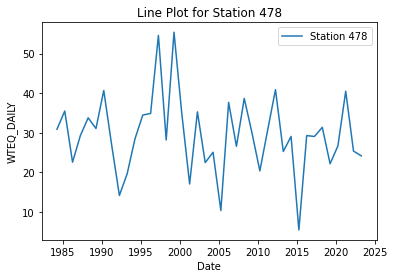

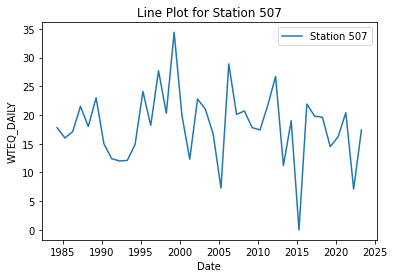

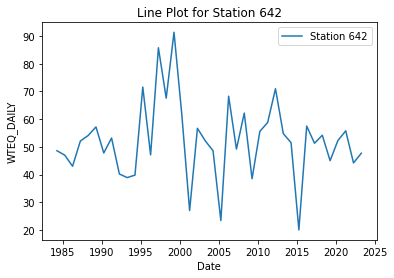

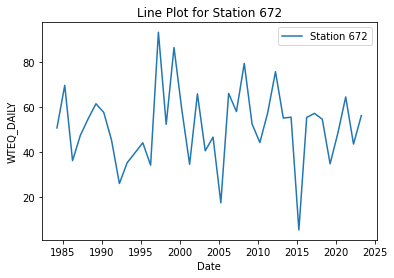

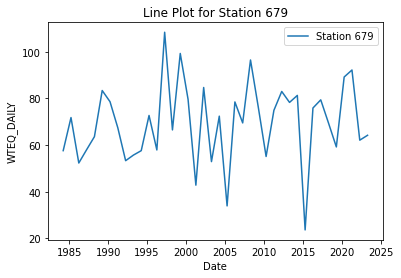

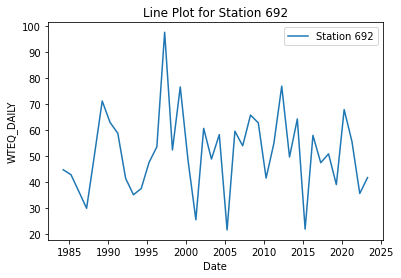

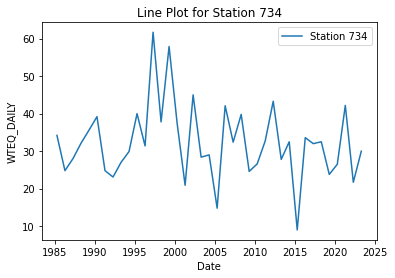

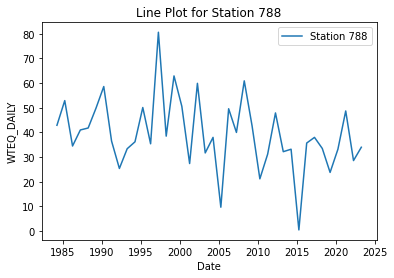

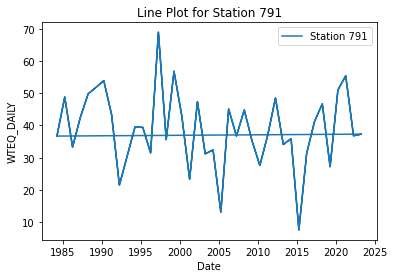

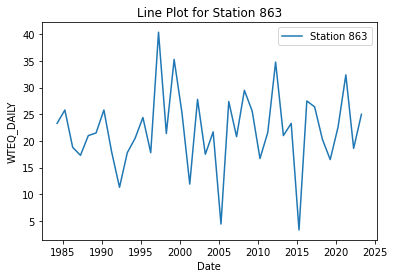

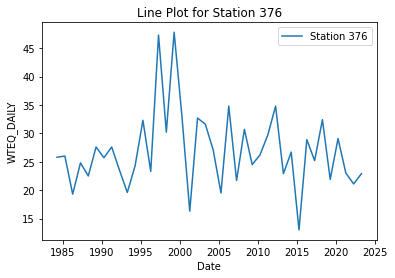

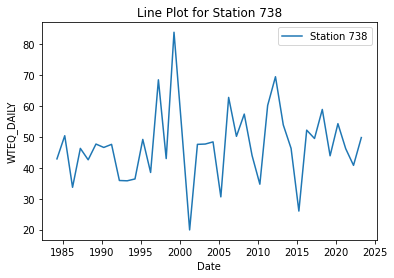

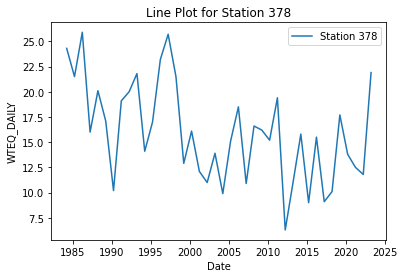

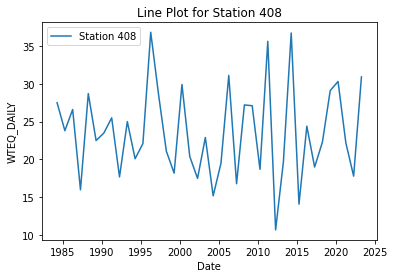

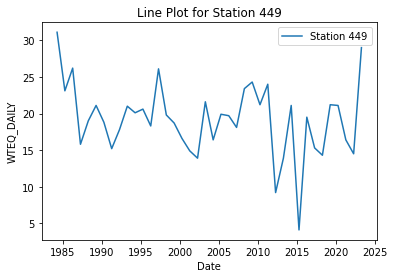

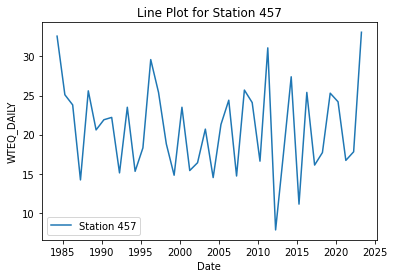

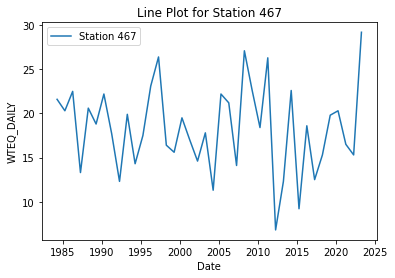

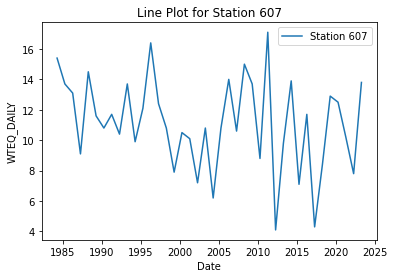

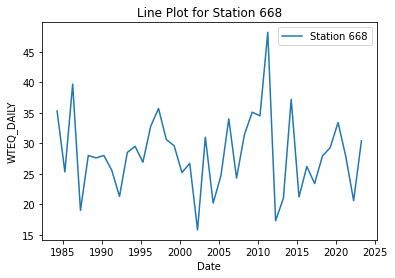

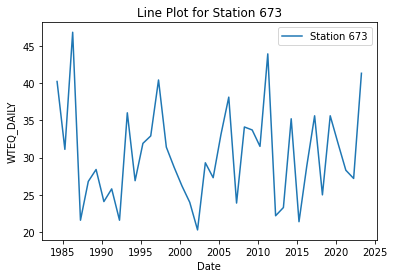

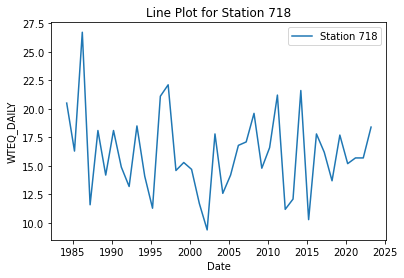

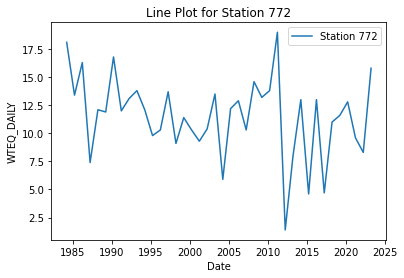

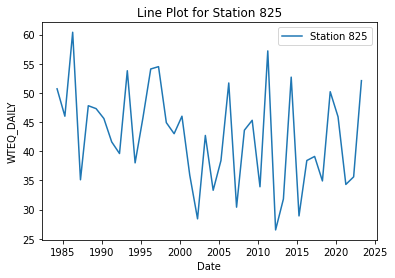

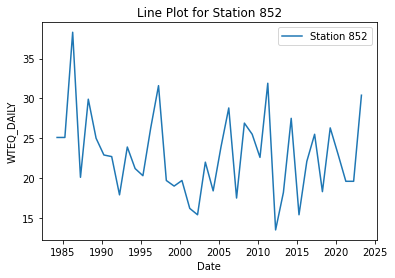

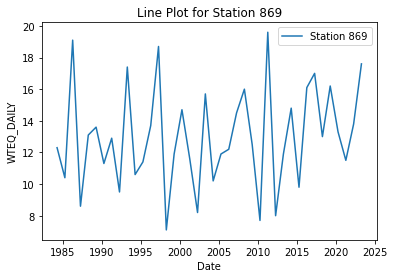

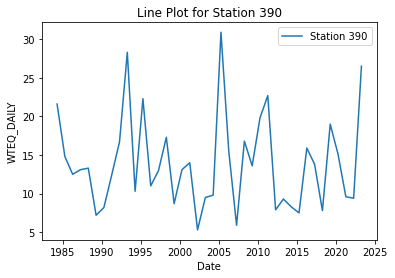

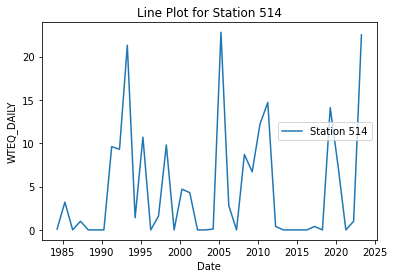

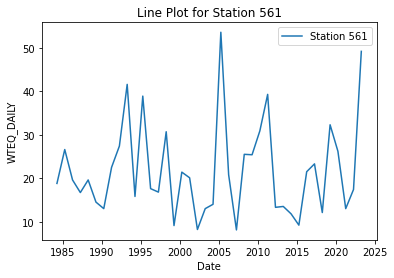

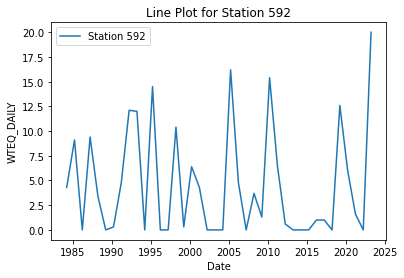

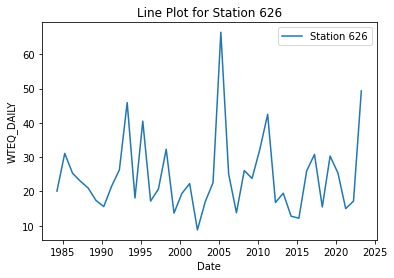

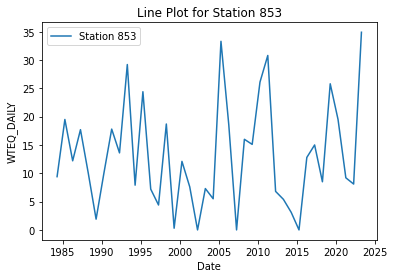

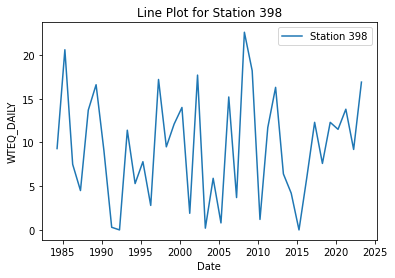

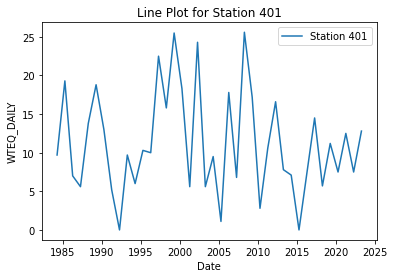

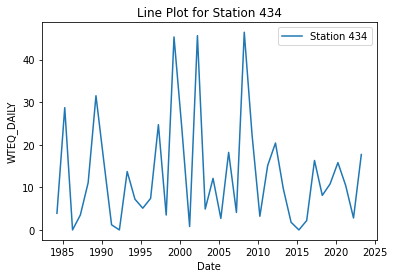

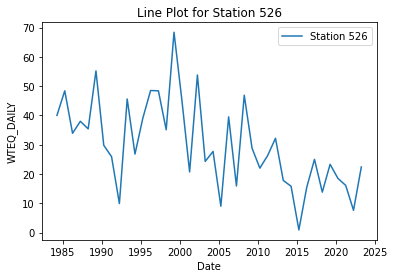

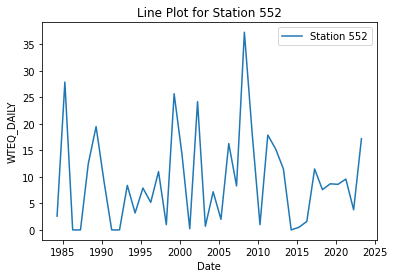

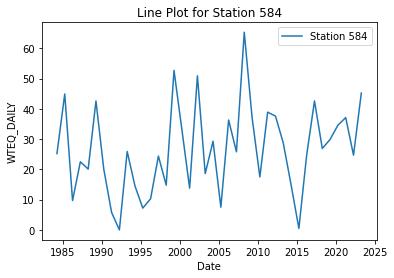

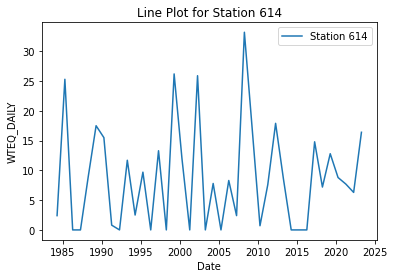

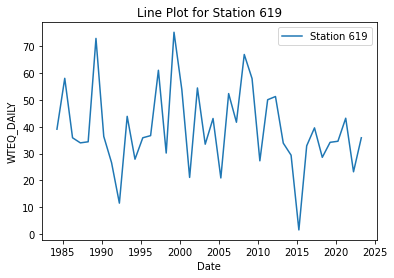

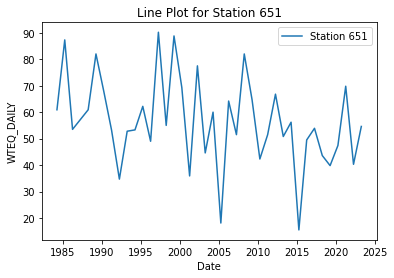

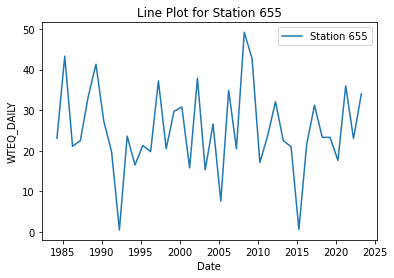

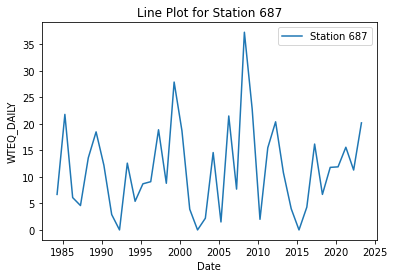

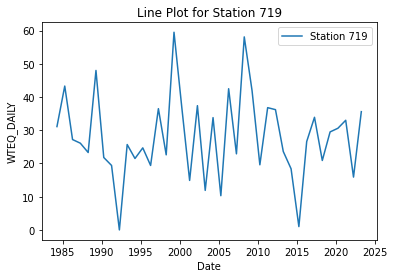

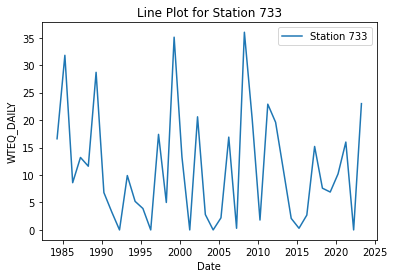

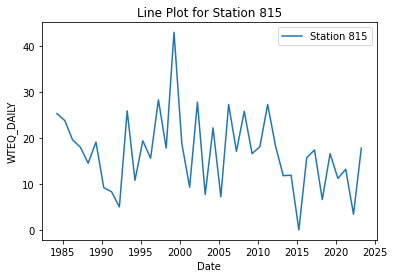

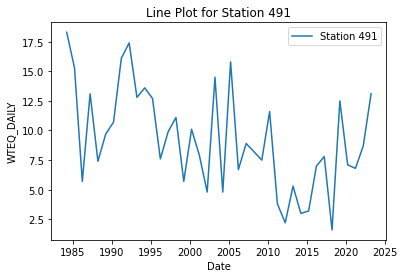

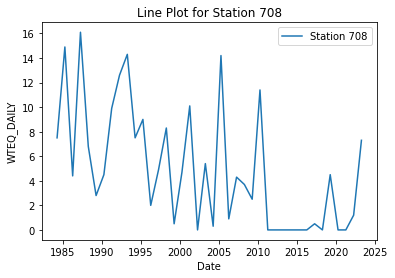

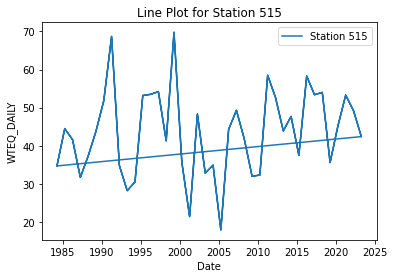

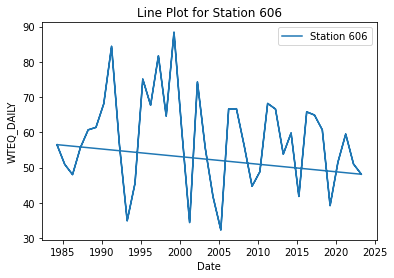

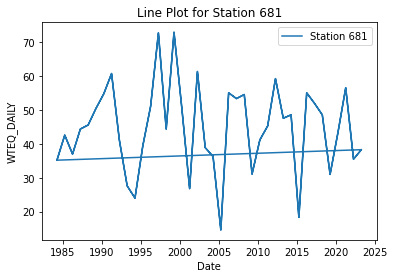

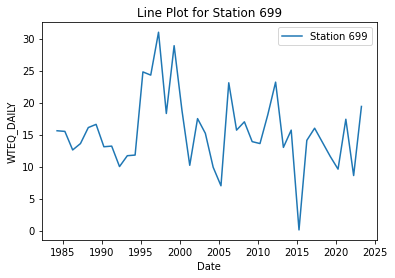

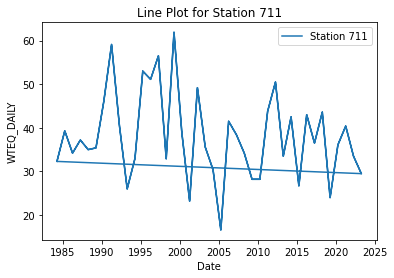

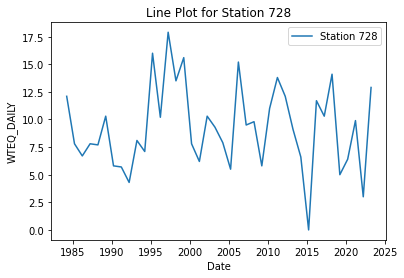

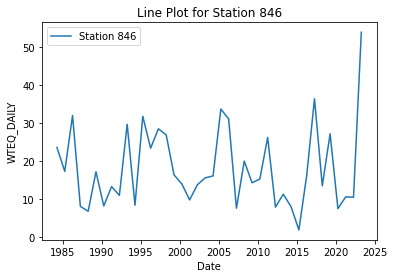

In [7]:
import matplotlib.dates as mdates

groups = snotel_df['station'].unique()
#sites = snotel_df['site'].unique()
#cmap = plt.get_cmap('tab25')

# Plot separate graphs for each group
for group in groups:
    group_data = snotel_df[snotel_df['station'] == group]
    
    plt.plot(group_data.index, group_data['WTEQ_DAILY'], label=f'Station {group}')#, color = cmap(i % cmap.N))
    
    date_format = mdates.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
    
    plt.title(f'Line Plot for Station {group}')
    plt.xlabel('Date')
    plt.ylabel('WTEQ_DAILY')
    plt.legend()

    plt.show()